In [1]:
# ===================================
# 
# SETUP
#
# ===================================

In [2]:
# -----------------------------------
# PICKLES

import dill

# ---- SESSIONS ----
#dill.dump_session('./working.db')
#dill.load_session('./working.db')

# ---- OBJECTS ----
#dill.dump(df_results, open("df_results.pkl", "wb"))

In [3]:
# -----------------------------------
# LIBRARY IMPORTS
import sqlite3
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_

In [4]:
# -----------------------------------
# RAW DATA IMPORT

'''# ---- CONVERT RAW SQLITE TABLES TO CSV FILES ----
db = sqlite3.connect('data/database.sqlite')
cursor = db.cursor()
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')
tables = cursor.fetchall()
for table_name in tables:
    table_name = table_name[0]
    table = pd.read_sql_query('SELECT * FROM %s' % table_name, db)
    table.to_csv(table_name + '.csv', index_label='index')
cursor.close()
db.close()
del table

table_names = pd.DataFrame(tables)
table_names.to_csv('data/table_names.csv')'''

'# ---- CONVERT RAW SQLITE TABLES TO CSV FILES ----\ndb = sqlite3.connect(\'data/database.sqlite\')\ncursor = db.cursor()\ncursor.execute(\'SELECT name FROM sqlite_master WHERE type="table";\')\ntables = cursor.fetchall()\nfor table_name in tables:\n    table_name = table_name[0]\n    table = pd.read_sql_query(\'SELECT * FROM %s\' % table_name, db)\n    table.to_csv(table_name + \'.csv\', index_label=\'index\')\ncursor.close()\ndb.close()\ndel table\n\ntable_names = pd.DataFrame(tables)\ntable_names.to_csv(\'data/table_names.csv\')'

In [5]:
# ---- IMPORT DATAFRAMES ----
table_names = pd.read_csv('data/table_names.csv', index_col=0)
names = [name[0] for name in table_names.values]

# Create dictionary
df = {}
for name in names:
    df[name] = pd.read_csv('data/'+name+'.csv', index_col=0)
    
# Unpack dictionary
raw_df_user = df['user']
raw_df_method = df['method']
raw_df_grade = df['grade']
raw_df_ascent = df['ascent']

# Delete unnecessary dataframes
del df
del raw_df_ascent.index.name
del raw_df_grade.index.name
del raw_df_method.index.name
del raw_df_user.index.name

C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# -----------------------------------
# RAW DATA INSPECTION
raw_df_user.head()

id first_name last_name             city country  sex  height  weight  \
0   1      first      last         Göteborg     SWE    0     177      73   
1   2      first      last        stockholm     SWE    0       0       0   
2   3      first      last             Umeå     SWE    0     180      78   
3   4      first      last         Goteborg     SWE    1     165      58   
4   5      first      last  North Attleboro     USA    0       0       0   

   started competitions occupation sponsor1 sponsor2 sponsor3  \
0     1996          NaN        NaN      NaN      NaN      NaN   
1     2000          NaN        NaN      NaN      NaN      NaN   
2     1995          NaN        NaN      NaN      NaN      NaN   
3     2001          NaN        NaN      NaN      NaN      NaN   
4     1991          NaN        NaN      NaN      NaN      NaN   

                       best_area worst_area guide_area interests       birth  \
0  Railay beach, Krabi, Thailand        NaN        NaN       NaN  1976-03-10   
1                            NaN        NaN        NaN       NaN         NaN   
2                           Hell       Umeå        NaN       NaN  1973-09-09   
3                            NaN        NaN        NaN       NaN  1984-07-26   
4                            NaN        NaN        NaN       NaN  1969-05-07   

  presentation  deactivated  anonymous  
0          NaN            0          0  
1          NaN            0          0  
2          NaN            0          0  
3          NaN            0          0  
4          NaN            0          0

In [7]:
raw_df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62593 entries, 0 to 62592
Data columns (total 22 columns):
id              62593 non-null int64
first_name      62593 non-null object
last_name       62593 non-null object
city            61163 non-null object
country         62495 non-null object
sex             62593 non-null int64
height          62593 non-null int64
weight          62593 non-null int64
started         62593 non-null int64
competitions    4888 non-null object
occupation      11778 non-null object
sponsor1        5355 non-null object
sponsor2        2656 non-null object
sponsor3        1497 non-null object
best_area       15413 non-null object
worst_area      220 non-null object
guide_area      7755 non-null object
interests       8577 non-null object
birth           27856 non-null object
presentation    6113 non-null object
deactivated     62593 non-null int64
anonymous       62593 non-null int64
dtypes: int64(7), object(15)
memory usage: 11.0+ MB


In [8]:
raw_df_ascent.head()

id  user_id  grade_id notes  raw_notes  method_id  climb_type  total_score  \
0   2      1.0        36   NaN          0          3           0          545   
1   3      1.0        36   NaN          0          3           0          545   
2   4      1.0        36   NaN          0          3           0          545   
3   5      1.0        36   NaN          0          3           0          545   
4   6      1.0        36   NaN          0          3           0          545   

          date    year  last_year      rec_date  project_ascent_date  \
0  918342000.0  1999.0        0.0  1.107126e+09                  0.0   
1  925509600.0  1999.0        0.0  1.107126e+09                  0.0   
2  933026400.0  1999.0        0.0  1.107126e+09                  0.0   
3  933026400.0  1999.0        0.0  1.107126e+09                  0.0   
4  933458400.0  1999.0        0.0  1.107126e+09                  0.0   

             name  crag_id                crag  sector_id         sector  \
0  The King And I  16596.0              Railay       61.0  Dum's kitchen   
1          vet ej      0.0    Nya berg - segl.        0.0            NaN   
2          Mr Big    209.0             Sjöända      371.0    Huvudväggen   
3   Tak ska du ha    209.0             Sjöända      371.0    Huvudväggen   
4   Korpen flyger      0.0  Rankulla, Vetlanda        0.0            NaN   

  country       comment  rating description  yellow_id  climb_try  repeat  \
0     THA  Thailand\r\n     0.0         NaN      255.0        0.0     0.0   
1     NaN          \r\n     0.0         NaN        0.0        0.0     0.0   
2     SWE          \r\n     0.0         NaN      255.0        0.0     0.0   
3     SWE          \r\n     0.0         NaN      255.0        0.0     0.0   
4     NaN          \r\n     0.0         NaN        0.0        0.0     0.0   

   exclude_from_ranking  user_recommended  chipped  
0                   0.0               0.0      0.0  
1                   0.0               0.0      0.0  
2                   0.0               0.0      0.0  
3                   0.0               0.0      0.0  
4                   0.0               0.0      0.0

In [9]:
raw_df_ascent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111878 entries, 0 to 4111876
Data columns (total 28 columns):
id                      int64
user_id                 float64
grade_id                int64
notes                   object
raw_notes               int64
method_id               int64
climb_type              int64
total_score             int64
date                    float64
year                    float64
last_year               float64
rec_date                float64
project_ascent_date     float64
name                    object
crag_id                 float64
crag                    object
sector_id               float64
sector                  object
country                 object
comment                 object
rating                  float64
description             object
yellow_id               float64
climb_try               float64
repeat                  float64
exclude_from_ranking    float64
user_recommended        float64
chipped                 float64
dtypes: float64

In [10]:
raw_df_method.head()

id  score shorthand      name
0   1      0  redpoint  Redpoint
1   2     53     flash     Flash
2   3    145   onsight   Onsight
3   4    -52   toprope   Toprope
4   5     95   onsight   Onsight

In [11]:
raw_df_method.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
id           5 non-null int64
score        5 non-null int64
shorthand    5 non-null object
name         5 non-null object
dtypes: int64(2), object(2)
memory usage: 200.0+ bytes


In [12]:
raw_df_grade.head()

Unnamed: 1  Unnamed: 2  id  Unnamed: 4  Unnamed: 5  score fra_routes  \
0         NaN         NaN   1         NaN         NaN      0          -   
1         1.0         1.0   2         1.0         1.0      0          1   
2         1.0         1.0   3         1.0         1.0      0         1a   
3         1.0         1.0   4         1.0         1.0      0         1b   
4         1.0         1.0   5         1.0         1.0      0         1c   

   fra_routes_input  fra_routes_selector fra_boulders  fra_boulders_input  \
0                 1                    1            -                   1   
1                 0                    0            1                   0   
2                 0                    0           1A                   0   
3                 0                    0           1B                   0   
4                 0                    0           1C                   0   

   fra_boulders_selector usa_routes  usa_routes_input  usa_routes_selector  \
0                      1      4-Mar                 1                    1   
1                      0        NaN                 0                    0   
2                      0        NaN                 0                    0   
3                      0        NaN                 0                    0   
4                      0        NaN                 0                    0   

  usa_boulders  usa_boulders_input  usa_boulders_selector  
0           VB                   1                      1  
1          NaN                   0                      0  
2          NaN                   0                      0  
3          NaN                   0                      0  
4          NaN                   0                      0

In [13]:
raw_df_grade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 18 columns):
Unnamed: 1               82 non-null float64
Unnamed: 2               82 non-null float64
id                       83 non-null int64
Unnamed: 4               82 non-null float64
Unnamed: 5               82 non-null float64
score                    83 non-null int64
fra_routes               83 non-null object
fra_routes_input         83 non-null int64
fra_routes_selector      83 non-null int64
fra_boulders             83 non-null object
fra_boulders_input       83 non-null int64
fra_boulders_selector    83 non-null int64
usa_routes               47 non-null object
usa_routes_input         83 non-null int64
usa_routes_selector      83 non-null int64
usa_boulders             45 non-null object
usa_boulders_input       83 non-null int64
usa_boulders_selector    83 non-null int64
dtypes: float64(4), int64(10), object(4)
memory usage: 12.3+ KB


As seen above, there is a fair amount of data to wrangle: 62593 user ID entries with 22 columns each, 4111878 ascent entries with 28 columns each, five method entires (although one of them seems to be a duplicate) with four columns each, and 83 grade entires with 14 columns each.

There is a fair amount of NULL data to consider.

In [14]:
# ===================================
# 
# DATA CLEANING
#
# ===================================
df_user = raw_df_user.copy()
df_ascent = raw_df_ascent.copy()

In [15]:
# -----------------------------------
# USER DATAFRAME

# Drop unnecessary columns
df_user = df_user.drop(columns=['first_name', 'last_name', 'city', 'country', 
        'competitions', 'occupation', 'sponsor1', 'sponsor2', 
        'sponsor3', 'best_area', 'worst_area', 'guide_area',
        'interests', 'presentation', 'deactivated', 'anonymous'])

In [16]:
# ---- NULL/EMPTY VALUES
# Check for duplicate user IDs
if df_user['id'].duplicated().sum() == 0:
    print('No duplicate user IDs')
else:
    print('*** Duplicate user IDs found ***')

No duplicate user IDs


In [17]:
# NULL and empty value check
if df_user.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_user.isnull().sum())
    print('----------------')
    
if df_user[df_user==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_user[df_user==''].sum())
    print('----------------')

*** NULL values found ***
----------------
id             0
sex            0
height         0
weight         0
started        0
birth      34737
dtype: int64
----------------


No empty string values


Text(0.5,1,'Null value heatmap (yellow is NULL)')

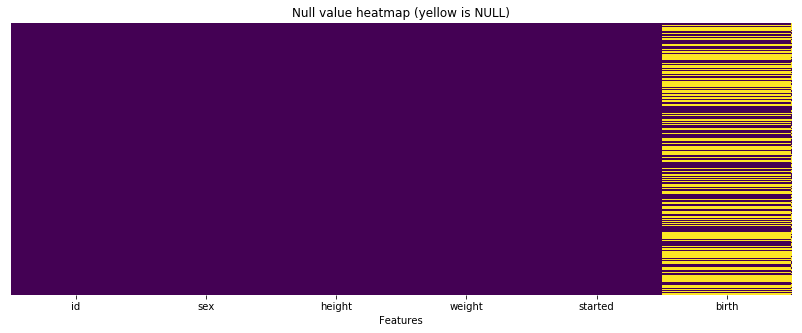

In [18]:
# Null value heatmap
plt.figure(figsize=(14,5))
sns.heatmap(df_user.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Features')
plt.title('Null value heatmap (yellow is NULL)')

In [19]:
# NULL value percentage
df_user['birth'].isnull().sum()/len(df_user['birth'])

0.5549662102791046

More than half of the users do not have 'birth' values logged. Instead of imputing these values we will use a reduced dataset when considering age as a variable.

In [20]:
# ---- DATA TYPES ----

In [21]:
df_user.head()

id  sex  height  weight  started       birth
0   1    0     177      73     1996  1976-03-10
1   2    0       0       0     2000         NaN
2   3    0     180      78     1995  1973-09-09
3   4    1     165      58     2001  1984-07-26
4   5    0       0       0     1991  1969-05-07

In [22]:
# Check dataframe
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62593 entries, 0 to 62592
Data columns (total 6 columns):
id         62593 non-null int64
sex        62593 non-null int64
height     62593 non-null int64
weight     62593 non-null int64
started    62593 non-null int64
birth      27856 non-null object
dtypes: int64(5), object(1)
memory usage: 3.3+ MB


In [23]:
df_user['sex'].unique()

array([  0,   1, 255], dtype=int64)

In [24]:
df_user['sex'].value_counts()

0      53898
1       8691
255        4
Name: sex, dtype: int64

In [25]:
# Drop sex=255
df_user = df_user.drop(index=list(df_user[df_user['sex']==255].index))

In [26]:
# Sex dummy variables

In [27]:
df_user.groupby(by='sex').mean()

id     height     weight      started
sex                                                 
0    32624.790122  85.152065  34.961297  1070.977940
1    36105.076056  76.043263  21.729951  1075.661834

There are significantly less sex=1 users and sex=1 users are on average shorter and lighter. It is thus assumed that sex=1 refers to females. As such, let's rename 'sex' to 'is_female'.

In [28]:
df_user.rename(columns={'sex':'is_female'}, inplace=True)

In [29]:
# ---- FILTER ----
# Filter to realistic heights
print(sorted(df_user['height'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 15, 17, 18, 20, 22, 23, 25, 27, 30, 35, 45, 46, 48, 49, 52, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 84, 85, 86, 88, 89, 90, 91, 94, 95, 96, 99, 100, 101, 102, 105, 110, 111, 112, 113, 114, 115, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 225, 228, 230, 233, 234, 247, 250, 251, 254, 255]


These values are presumably centimeters. Let's filter to users having logged height between 120 and 240 cm (~4-8 feet)

In [30]:
# ---- DATES ----
# Manage dates; extract years and convert to floats (to deal with NaNs)
print(sorted(df_user['started'].unique()))

[0, 1901, 1902, 1906, 1907, 1909, 1912, 1914, 1915, 1917, 1919, 1920, 1922, 1925, 1928, 1929, 1938, 1942, 1943, 1945, 1950, 1952, 1956, 1957, 1958, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021, 2025, 2050, 2090]


In [31]:
df_user['started'] = pd.to_datetime(df_user['started'], errors='coerce', format='%Y')

In [32]:
df_user['started'] = [date.year for date in df_user['started']]

In [33]:
df_user['birth_year'] = pd.to_datetime(df_user['birth'], errors='coerce')

In [34]:
df_user = df_user.drop(columns='birth')

In [35]:
df_user['birth_year'] = [date.year for date in df_user['birth_year']]

In [36]:
df_user.head()

id  is_female  height  weight  started  birth_year
0   1          0     177      73   1996.0      1976.0
1   2          0       0       0   2000.0         NaN
2   3          0     180      78   1995.0      1973.0
3   4          1     165      58   2001.0      1984.0
4   5          0       0       0   1991.0      1969.0

In [37]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62589 entries, 0 to 62592
Data columns (total 6 columns):
id            62589 non-null int64
is_female     62589 non-null int64
height        62589 non-null int64
weight        62589 non-null int64
started       33470 non-null float64
birth_year    27854 non-null float64
dtypes: float64(2), int64(4)
memory usage: 3.3 MB


In [38]:
# Checkpoint
checkpoint_df_user_1 = df_user.copy()

In [39]:
# -----------------------------------
# ASCENT DATAFRAME

# ---- DROP COLUMNS ----
df_ascent = df_ascent.drop(columns=['notes', 'raw_notes',
        'total_score', 'date', 'last_year', 'rec_date', 'project_ascent_date', 
        'name', 'crag_id', 'crag', 'sector_id', 'sector', 'country', 'comment', 
        'rating', 'description', 'yellow_id', 'climb_try', 'repeat', 
        'exclude_from_ranking', 'user_recommended', 'chipped'])

In [40]:
df_ascent.columns

Index(['id', 'user_id', 'grade_id', 'method_id', 'climb_type', 'year'], dtype='object')

In [41]:
# ---- DUPLICATES ----
if df_ascent['id'].duplicated().sum() == 0:
    print('No duplicate ascent IDs')
else:
    print('*** Duplicate ascent IDs found ***')

*** Duplicate ascent IDs found ***


In [42]:
df_ascent[df_ascent['id'].duplicated()]

id  user_id  grade_id  method_id  climb_type  year
ux. 3rd go   3      NaN       255          0           0   NaN

In [43]:
# ---- NULL/EMPTY ----
if df_ascent.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_ascent.isnull().sum())
    print('----------------')
    
if df_ascent[df_ascent==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_ascent[df_ascent==''].sum())
    print('----------------')

*** NULL values found ***
----------------
id            0
user_id       1
grade_id      0
method_id     0
climb_type    0
year          1
dtype: int64
----------------


No empty string values


In [44]:
df_ascent = df_ascent.dropna()

In [45]:
# NULL and empty value check
if df_ascent.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_ascent.isnull().sum())
    print('----------------')
    
if df_ascent[df_ascent==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_ascent[df_ascent==''].sum())
    print('----------------')

No NULL values


No empty string values


In [46]:
# Check for duplicate ascent IDs
if df_ascent['id'].duplicated().sum() == 0:
    print('No duplicate ascent IDs')
else:
    print('*** Duplicate ascent IDs found ***')

No duplicate ascent IDs


In [47]:
# ---- DATA TYPES ----
df_ascent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111877 entries, 0 to 4111876
Data columns (total 6 columns):
id            int64
user_id       float64
grade_id      int64
method_id     int64
climb_type    int64
year          float64
dtypes: float64(2), int64(4)
memory usage: 219.6+ MB


In [48]:
# Convert user id to integer
df_ascent['user_id'] = [int(value) for value in df_ascent['user_id']]

In [49]:
# Look at year
print(sorted(df_ascent['year'].unique()))

[0.0, 7.0, 11.0, 13.0, 16.0, 199.0, 200.0, 201.0, 203.0, 205.0, 207.0, 208.0, 209.0, 1009.0, 1095.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]


There are many bogus years included but we'll leave them for now.

In [50]:
# Checkpoint
checkpoint_df_ascent_1 = df_ascent.copy()

In [51]:
# -----------------------------------
# GRADE DATAFRAME
raw_df_grade.head()

Unnamed: 1  Unnamed: 2  id  Unnamed: 4  Unnamed: 5  score fra_routes  \
0         NaN         NaN   1         NaN         NaN      0          -   
1         1.0         1.0   2         1.0         1.0      0          1   
2         1.0         1.0   3         1.0         1.0      0         1a   
3         1.0         1.0   4         1.0         1.0      0         1b   
4         1.0         1.0   5         1.0         1.0      0         1c   

   fra_routes_input  fra_routes_selector fra_boulders  fra_boulders_input  \
0                 1                    1            -                   1   
1                 0                    0            1                   0   
2                 0                    0           1A                   0   
3                 0                    0           1B                   0   
4                 0                    0           1C                   0   

   fra_boulders_selector usa_routes  usa_routes_input  usa_routes_selector  \
0                      1      4-Mar                 1                    1   
1                      0        NaN                 0                    0   
2                      0        NaN                 0                    0   
3                      0        NaN                 0                    0   
4                      0        NaN                 0                    0   

  usa_boulders  usa_boulders_input  usa_boulders_selector  
0           VB                   1                      1  
1          NaN                   0                      0  
2          NaN                   0                      0  
3          NaN                   0                      0  
4          NaN                   0                      0

In [52]:
raw_df_grade['id'].nunique()

83

In [53]:
print(sorted(raw_df_grade['id'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]


In [54]:
raw_df_grade['fra_routes'].nunique()

83

In [55]:
print(sorted(raw_df_grade['fra_routes'].unique()))

['-', '1', '1+', '1a', '1b', '1c', '2', '2+', '2a', '2b', '2c', '3', '3+', '3a', '3a+', '3b', '3b+', '3c', '3c+', '4', '4+', '4a', '4a+', '4b', '4b+', '4c', '4c+', '5', '5a', '5a+', '5b', '5b+', '5c', '5c+', '6', '6a', '6a+', '6a+/6b', '6a/+', '6b', '6b+', '6b+/6c', '6b/+', '6c', '6c+', '6c+/7a', '6c/+', '7a', '7a+', '7a+/7b', '7a/+', '7b', '7b+', '7b+/7c', '7b/+', '7c', '7c+', '7c+/8a', '7c/+', '8a', '8a+', '8a+/8b', '8a/+', '8b', '8b+', '8b+/8c', '8b/+', '8c', '8c+', '8c+/9a', '8c/+', '9a', '9a+', '9a+/9b', '9a/+', '9b', '9b+', '9b+/9c', '9b/+', '9c', '9c+', '9c+/10a', '9c/+']


There are 83 unique grade IDs that range from 1-86; clearly, some are skipped (specifically, 48, 61, and 74). Consider using the grade dataframe index instead of 'id'

In [56]:
df_grade = raw_df_grade.copy()

In [57]:
df_grade['index_grade'] = df_grade.index

In [58]:
checkpoint_df_grade_1 = df_grade.copy()

In [59]:
# -----------------------------------
# METHOD DATAFRAME
raw_df_method

id  score shorthand      name
0   1      0  redpoint  Redpoint
1   2     53     flash     Flash
2   3    145   onsight   Onsight
3   4    -52   toprope   Toprope
4   5     95   onsight   Onsight

I don't know what the score column is, but regardless this identifies the different climb types. For this analysis, I will not consider top ropes since I don't think that's a true measure of a person's climbing ability.

In [60]:
# ===================================
#
# MERGE DATA
#
# ===================================

# -----------------------------------
# MERGE USERS WITH ASCENTS
df = df_ascent.merge(df_user, left_on='user_id', right_on='id', suffixes=('_ascent','_user'))

In [61]:
df.head()

id_ascent  user_id  grade_id  method_id  climb_type    year  id_user  \
0          2        1        36          3           0  1999.0        1   
1          3        1        36          3           0  1999.0        1   
2          4        1        36          3           0  1999.0        1   
3          5        1        36          3           0  1999.0        1   
4          6        1        36          3           0  1999.0        1   

   is_female  height  weight  started  birth_year  
0          0     177      73   1996.0      1976.0  
1          0     177      73   1996.0      1976.0  
2          0     177      73   1996.0      1976.0  
3          0     177      73   1996.0      1976.0  
4          0     177      73   1996.0      1976.0

In [62]:
df = df[['user_id', 'is_female', 'height', 'weight', 'birth_year', 'started', 
    'id_ascent', 'method_id', 'grade_id', 'climb_type', 'year']]

In [63]:
# ---- ADD NEW COLUMNS ----

In [64]:
df['age'] = df['year'] - df['birth_year']

In [65]:
df['years_climbing'] = df['year'] - df['started']

In [66]:
df = df.drop(columns=['year','birth_year','started'])

In [67]:
df.head(2)

user_id  is_female  height  weight  id_ascent  method_id  grade_id  \
0        1          0     177      73          2          3        36   
1        1          0     177      73          3          3        36   

   climb_type   age  years_climbing  
0           0  23.0             3.0  
1           0  23.0             3.0

Note that inspection of several specific climbs with their online descriptions revealed that 'climb_type' refers to whether it is a bouldering climb ('climb_type'=1) or whether it is a rope climb ('climb_type'=0). Let's rename that to 'is_bouldering'.

In [68]:
# Rename columns
df.rename(columns={'user_id':'id_user',
                   'method_id':'id_method',
                   'grade_id':'id_grade',
                   'climb_type':'is_bouldering'}, inplace=True)

In [69]:
df.head(2)

id_user  is_female  height  weight  id_ascent  id_method  id_grade  \
0        1          0     177      73          2          3        36   
1        1          0     177      73          3          3        36   

   is_bouldering   age  years_climbing  
0              0  23.0             3.0  
1              0  23.0             3.0

In [70]:
# Drop id_grade in favor of the grade index to get rid of the skipped grade IDs
df = df.merge(df_grade[['id','index_grade']], left_on='id_grade', right_on='id', suffixes=('_ascent','_user'))

In [71]:
df.head(2)

id_user  is_female  height  weight  id_ascent  id_method  id_grade  \
0        1          0     177      73          2          3        36   
1        1          0     177      73          3          3        36   

   is_bouldering   age  years_climbing  id  index_grade  
0              0  23.0             3.0  36           35  
1              0  23.0             3.0  36           35

In [72]:
print(sorted(df['id_grade'].unique()))

[1, 7, 13, 15, 17, 21, 23, 25, 29, 31, 33, 36, 38, 40, 42, 44, 46, 49, 51, 53, 55, 57, 59, 62, 64, 66, 68, 70, 71, 72, 73, 75, 77, 79, 81, 83]


In [73]:
print(sorted(df['id'].unique()))

[1, 7, 13, 15, 17, 21, 23, 25, 29, 31, 33, 36, 38, 40, 42, 44, 46, 49, 51, 53, 55, 57, 59, 62, 64, 66, 68, 70, 71, 72, 73, 75, 77, 79, 81, 83]


In [74]:
print(sorted(df['index_grade'].unique()))

[0, 6, 12, 14, 16, 20, 22, 24, 28, 30, 32, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 68, 69, 70, 71, 73, 75, 77, 79]


In [75]:
df = df.drop(columns=['id_grade','id'])

In [76]:
df.head(2)

id_user  is_female  height  weight  id_ascent  id_method  is_bouldering  \
0        1          0     177      73          2          3              0   
1        1          0     177      73          3          3              0   

    age  years_climbing  index_grade  
0  23.0             3.0           35  
1  23.0             3.0           35

In [77]:
# Checkpoint
checkpoint_df_1 = df.copy()

In [78]:
# ===================================
#
# FINALIZE/FILTER DATA
#
# ===================================

In [79]:
raw_df_method

id  score shorthand      name
0   1      0  redpoint  Redpoint
1   2     53     flash     Flash
2   3    145   onsight   Onsight
3   4    -52   toprope   Toprope
4   5     95   onsight   Onsight

In [80]:
df.head()

id_user  is_female  height  weight  id_ascent  id_method  is_bouldering  \
0        1          0     177      73          2          3              0   
1        1          0     177      73          3          3              0   
2        1          0     177      73          4          3              0   
3        1          0     177      73          5          3              0   
4        1          0     177      73          6          3              0   

    age  years_climbing  index_grade  
0  23.0             3.0           35  
1  23.0             3.0           35  
2  23.0             3.0           35  
3  23.0             3.0           35  
4  23.0             3.0           35

In [81]:
df['id_method'].unique()

array([3, 1, 2, 5, 4], dtype=int64)

In [82]:
df[df['id_method'] != 4]['id_method'].unique()

array([3, 1, 2, 5], dtype=int64)

In [83]:
df = df[df['id_method'] != 4]

In [84]:
df['id_method'].unique()

array([3, 1, 2, 5], dtype=int64)

In [85]:
df = df.drop(columns=['id_method'])

In [86]:
df.shape

(4046161, 9)

In [87]:
print(sorted(df['height'].unique()))

[0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 18, 20, 22, 25, 27, 30, 35, 45, 52, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 83, 84, 85, 86, 89, 90, 96, 100, 101, 105, 110, 111, 112, 113, 114, 115, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 215, 216, 220, 222, 228, 247, 250, 251, 254, 255]


In [88]:
print(sorted(df['weight'].unique()))

[0, 40, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98, 100]


In [89]:
print(sorted(df['age'].unique()))

[-1989.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, nan, -1986.0, -1983.0, -1982.0, -1981.0, -1980.0, -1978.0, -1977.0, -1973.0, -1971.0, -1970.0, -1966.0, -1961.0, -1802.0, -1795.0, -1792.0, -1786.0, -1785.0, -1784.0, -1783.0, -1781.0, -1780.0, -1779.0, -1778.0, -1777.0, -1775.0, -1774.0, -1772.0, -1769.0, -1768.0, -1764.0, -959.0, -875.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0

In [90]:
print(sorted(df['years_climbing'].unique()))

[-2001.0, -1996.0, -1985.0, -12.0, -10.0, -9.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 17.0, nan, -2004.0, -2000.0, -1999.0, -1997.0, -1994.0, -1992.0, -1989.0, -1988.0, -1809.0, -1808.0, -1807.0, -1806.0, -1804.0, -1801.0, -1800.0, -1799.0, -1798.0, -1797.0, -1796.0, -1794.0, -1793.0, -1792.0, -1791.0, -1789.0, -1784.0, -995.0, -896.0, -83.0, -82.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -19.0, -17.0, -16.0, -15.0, -14.0, -13.0, -11.0, -8.0, -7.0, -6.0, -5.0, -4.0, 15.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 57.0, 59.0, 60.0, 61.0, 62.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 75.0, 76.0, 77.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 9

In [91]:
df.isnull().sum()

id_user                0
is_female              0
height                 0
weight                 0
id_ascent              0
is_bouldering          0
age               882683
years_climbing    697857
index_grade            0
dtype: int64

In [92]:
(df['age'].isnull().sum())/len(df)

0.2181532074477511

To really gage performance, it's important to not consider every single climb a given user does. Instead, let's extract the most difficult (ie highest 'index_grade') per user. Create different tables for bouldering vs rope climbing and for gender as well.

In [93]:
# Find max bouldering and rope climbing grades per user
df_max_grades = df[['id_user','index_grade','is_bouldering']].groupby(by=['id_user','is_bouldering'], as_index=False).max()

In [94]:
df_max_grades.head()

id_user  is_bouldering  index_grade
0        1              0           59
1        1              1           49
2        2              0           47
3        2              1           45
4        3              0           59

In [95]:
# Filter df to only max grades
df_all = df_max_grades.merge(df, on=['id_user','index_grade','is_bouldering'])

In [96]:
df_all.head()

id_user  is_bouldering  index_grade  is_female  height  weight  id_ascent  \
0        1              0           59          0     177      73      11324   
1        1              1           49          0     177      73      56997   
2        1              1           49          0     177      73     294319   
3        1              1           49          0     177      73     294320   
4        1              1           49          0     177      73     301240   

    age  years_climbing  
0  25.0             5.0  
1  26.0             6.0  
2  29.0             9.0  
3  29.0             9.0  
4  29.0             9.0

In [97]:
# Reduce df to only include first personal best per user
df_all = df_all.sort_values(by=['id_user','is_bouldering','age']).\
        drop_duplicates(subset=['id_user','is_bouldering'], keep='first')

In [98]:
df_all.head()

id_user  is_bouldering  index_grade  is_female  height  weight  id_ascent  \
0        1              0           59          0     177      73      11324   
1        1              1           49          0     177      73      56997   
5        2              0           47          0       0       0        126   
6        2              1           45          0       0       0        318   
7        3              0           59          0     180      78        915   

    age  years_climbing  
0  25.0             5.0  
1  26.0             6.0  
5   NaN             1.0  
6   NaN             1.0  
7  26.0             4.0

In [99]:
df_all = df_all.drop(columns=['id_ascent'])

In [100]:
df_all.columns

Index(['id_user', 'is_bouldering', 'index_grade', 'is_female', 'height',
       'weight', 'age', 'years_climbing'],
      dtype='object')

In [101]:
df_all = df_all[['id_user','is_female','height','weight',
                'is_bouldering','index_grade','age','years_climbing']]

In [102]:
df_all.shape

(49598, 8)

In [103]:
df_all.head()

id_user  is_female  height  weight  is_bouldering  index_grade   age  \
0        1          0     177      73              0           59  25.0   
1        1          0     177      73              1           49  26.0   
5        2          0       0       0              0           47   NaN   
6        2          0       0       0              1           45   NaN   
7        3          0     180      78              0           59  26.0   

   years_climbing  
0             5.0  
1             6.0  
5             1.0  
6             1.0  
7             4.0

In [104]:
# -----------------------------------
# CREATE GENDER AND CLIMBING TYPE SUBSETS
df_bouldering_female = df_all[(df_all['is_bouldering']==1) & (df_all['is_female']==1)]
df_bouldering_male =   df_all[(df_all['is_bouldering']==1) & (df_all['is_female']==0)]
df_rope_female =       df_all[(df_all['is_bouldering']==0) & (df_all['is_female']==1)]
df_rope_male =         df_all[(df_all['is_bouldering']==0) & (df_all['is_female']==0)]

In [105]:
# Re-order columns
df_all.columns

Index(['id_user', 'is_female', 'height', 'weight', 'is_bouldering',
       'index_grade', 'age', 'years_climbing'],
      dtype='object')

In [106]:
df_bouldering_female.columns

Index(['id_user', 'is_female', 'height', 'weight', 'is_bouldering',
       'index_grade', 'age', 'years_climbing'],
      dtype='object')

In [107]:
# Drop unnecessary columns
df_bouldering_female = df_bouldering_female.drop(columns=['is_female','is_bouldering'])
df_bouldering_male = df_bouldering_male.drop(columns=['is_female','is_bouldering'])
df_rope_female = df_rope_female.drop(columns=['is_female','is_bouldering'])
df_rope_male = df_rope_male.drop(columns=['is_female','is_bouldering'])

In [108]:
df_bouldering_female.head()

id_user  height  weight  index_grade   age  years_climbing
10         4     165      58           41  22.0             5.0
86        36       0       0           35   NaN             1.0
337      149     174       0           63  30.0             2.0
539      249     160       0           49  34.0             7.0
834      385       0       0           47  23.0             4.0

In [109]:
# Re-set all indexes
df_all = df_all.reset_index(drop=True)
df_bouldering_female = df_bouldering_female.reset_index(drop=True)
df_bouldering_male = df_bouldering_male.reset_index(drop=True)
df_rope_female = df_rope_female.reset_index(drop=True)
df_rope_male = df_rope_male.reset_index(drop=True)

In [110]:
df_all.shape

(49598, 8)

In [111]:
df_bouldering_female.shape

(2396, 6)

In [112]:
df_bouldering_male.shape

(16817, 6)

In [113]:
df_rope_female.shape

(4592, 6)

In [114]:
df_rope_male.shape

(25793, 6)

In [115]:
# Checkpoint
checkpoint_df_all_1 = df_all.copy()
checkpoint_df_bouldering_female_1 = df_bouldering_female.copy()
checkpoint_df_bouldering_male_1 = df_bouldering_male.copy()
checkpoint_df_rope_female_1 = df_rope_female.copy()
checkpoint_df_rope_male_1 = df_rope_male.copy()

In [116]:
dill.dump(df_all, open("df_all.pkl", "wb"))
dill.dump(df_bouldering_female, open("df_bouldering_female.pkl", "wb"))
dill.dump(df_bouldering_male, open("df_bouldering_male.pkl", "wb"))
dill.dump(df_rope_female, open("df_rope_female.pkl", "wb"))
dill.dump(df_rope_male, open("df_rope_male.pkl", "wb"))

In [117]:
# ===================================
#
# EDA
#
# ===================================
df_all.head()

id_user  is_female  height  weight  is_bouldering  index_grade   age  \
0        1          0     177      73              0           59  25.0   
1        1          0     177      73              1           49  26.0   
2        2          0       0       0              0           47   NaN   
3        2          0       0       0              1           45   NaN   
4        3          0     180      78              0           59  26.0   

   years_climbing  
0             5.0  
1             6.0  
2             1.0  
3             1.0  
4             4.0

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


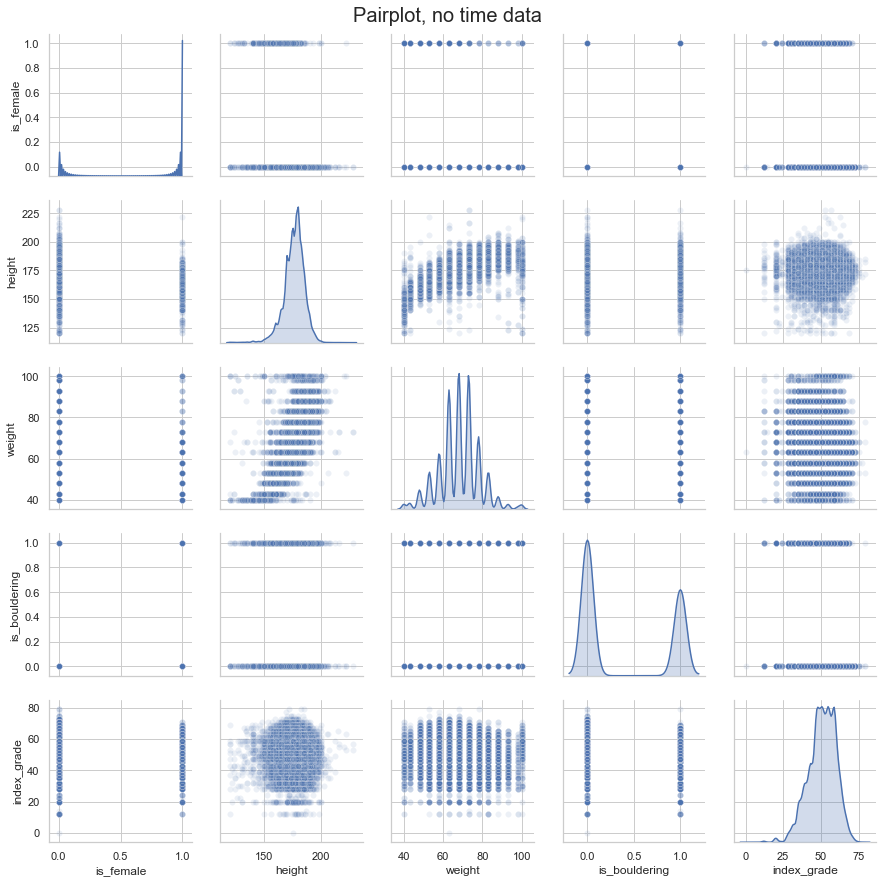

In [118]:
# -----------------------------------
# PAIRPLOTS

# ---- PAIRPLOT, NO TIME DATE ----
sns.set(style="whitegrid")
g = sns.pairplot(df_all[
    (df_all['height'] >= 120) & (df_all['height'] <= 240) &
    (df_all['weight'] != 0)]\
                 .drop(columns=['id_user','age','years_climbing']), 
                 diag_kind='kde', dropna=True, plot_kws={'alpha':0.1})
g.fig.suptitle("Pairplot, no time data", size=20)
plt.subplots_adjust(top=0.95)

In [119]:
# ---- PAIRPLOT, ALL DATA ----
sns.set(style="whitegrid")
g = sns.pairplot(df_all[
    (df_all['height'] >= 120) & (df_all['height'] <= 240) &
    (df_all['weight'] != 0) & 
    (df_all['age'] >= 10) & (df_all['age'] <= 50) & 
    (df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                 [['is_bouldering','is_female','height','weight','age','years_climbing','index_grade']], 
                 diag_kind='kde', dropna=True, plot_kws={'alpha':0.1})
g.fig.suptitle("Pairplot, filtered time data", size=20)
plt.subplots_adjust(top=0.95)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [120]:
# ===================================
#
# VISUALIZATIONS
#
# ===================================

In [121]:
# ===================================
# MEAN GRADE VS HEIGHT

In [122]:
sns.set(style='whitegrid')
g = sns.lmplot(x='height', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=6, col='is_bouldering', legend=False, fit_reg=False, scatter_kws={
                       'alpha':'0.2',
                       's':100*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','index_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                       .groupby(by=['is_female','height','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','height','index_grade']])
g.fig.suptitle('Mean Grade vs Height (cm)')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.1, 
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [123]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='height', y='index_grade', 
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               hue='is_female', palette=dict({0:'blue', 1:'red'}), sharex=False, sharey=False, 
               scatter_kws={
                       'alpha':'0.5',
                       's':300*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                   .groupby(['height','index_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
               .groupby(by=['is_female','height','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','height','index_grade']])
g.fig.suptitle('Mean Grade vs Height (cm)')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [124]:
# ===================================
# MEAN GRADE VS WEIGHT

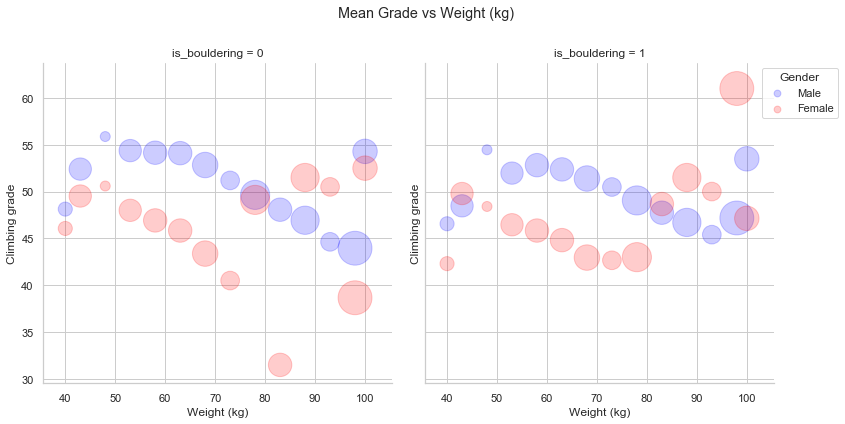

In [125]:
sns.set(style='whitegrid')
g = sns.lmplot(x='weight', y='index_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':50*df_all[(df_all['weight'] != 0)]\
                               .groupby(['weight','index_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)]\
                       .groupby(by=['is_female','weight','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','weight','index_grade']])
g.fig.suptitle('Mean Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.05,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

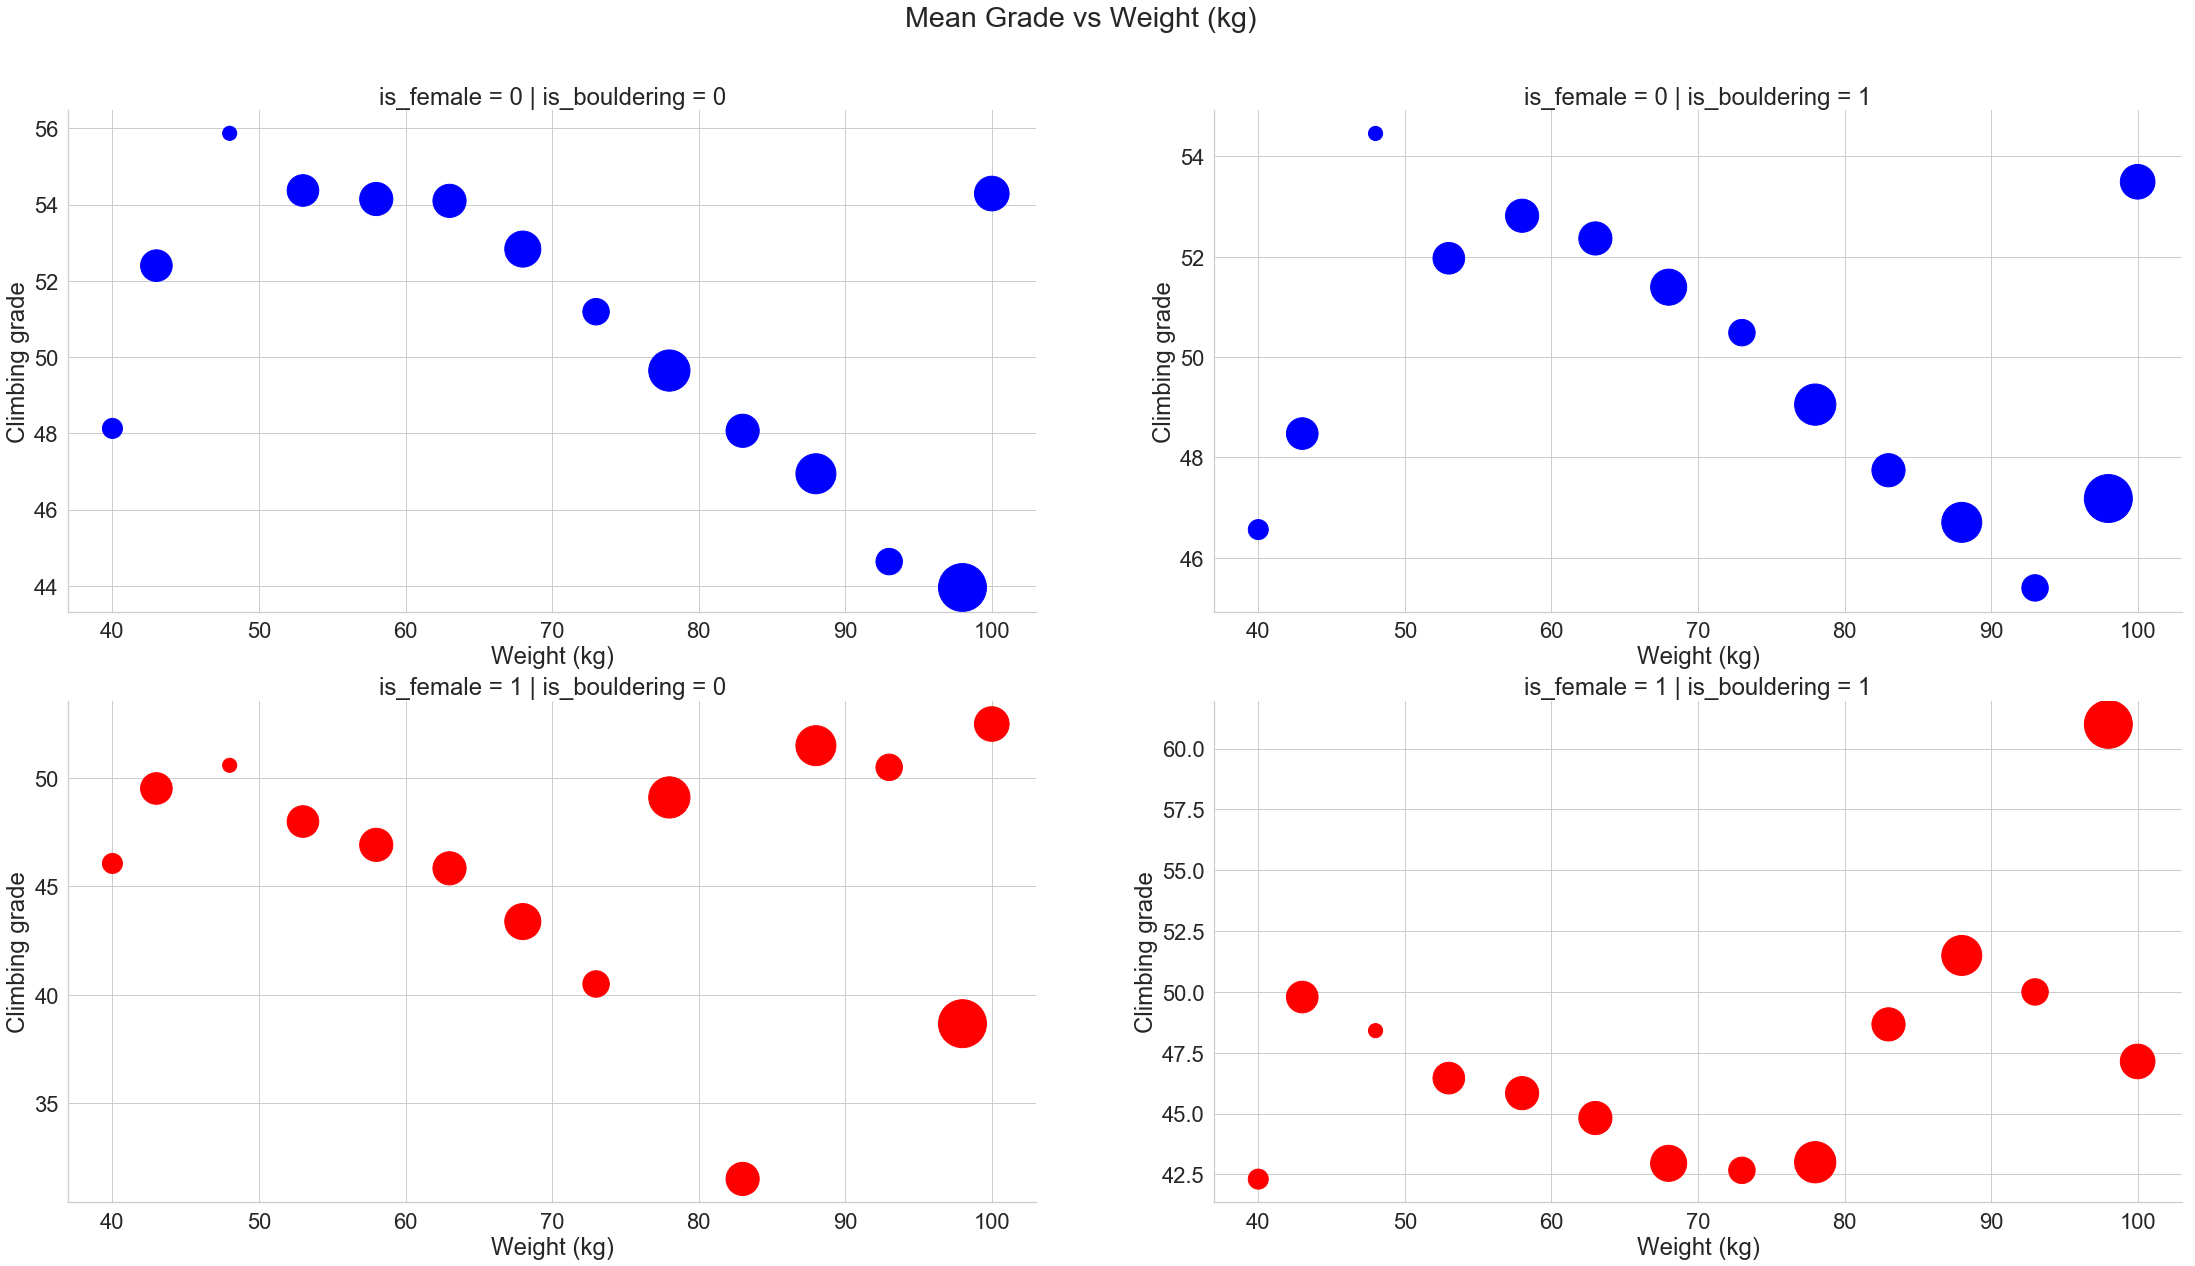

In [126]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='weight', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'1',
                       's':100*df_all[(df_all['weight'] != 0)].groupby(['weight','index_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)].groupby(by=['is_female','weight','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','weight','index_grade']])
g.fig.suptitle('Mean Grade vs Weight (kg)')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [127]:
# ===================================
# MEAN GRADE VS YEARS CLIMBING

In [128]:
sns.set(style='whitegrid')
g = sns.lmplot(x='years_climbing', y='index_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':5*df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','index_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                       .groupby(by=['is_female','years_climbing','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','years_climbing','index_grade']])
g.fig.suptitle('Mean Grade vs Years Climbing')
g.set(xlabel='Years climbing', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.3,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [129]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='years_climbing', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'0.5',
                       's':20*df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','index_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                       .groupby(by=['is_female','years_climbing','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','years_climbing','index_grade']])
g.fig.suptitle('Mean Grade vs Years Climbing')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Years climbing', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [130]:
# ===================================
# MEAN GRADE VS AGE

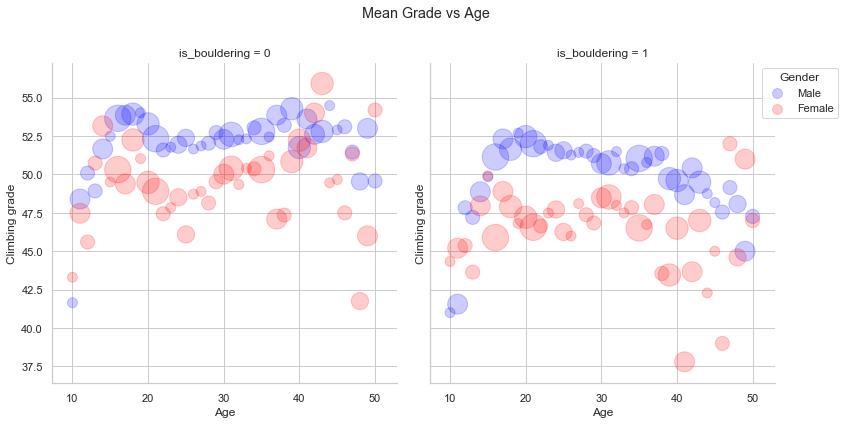

In [131]:
sns.set(style='whitegrid')
g = sns.lmplot(x='age', y='index_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':100*df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                               .groupby(['age','index_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                       .groupby(by=['is_female','age','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','age','index_grade']])
g.fig.suptitle('Mean Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.1,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

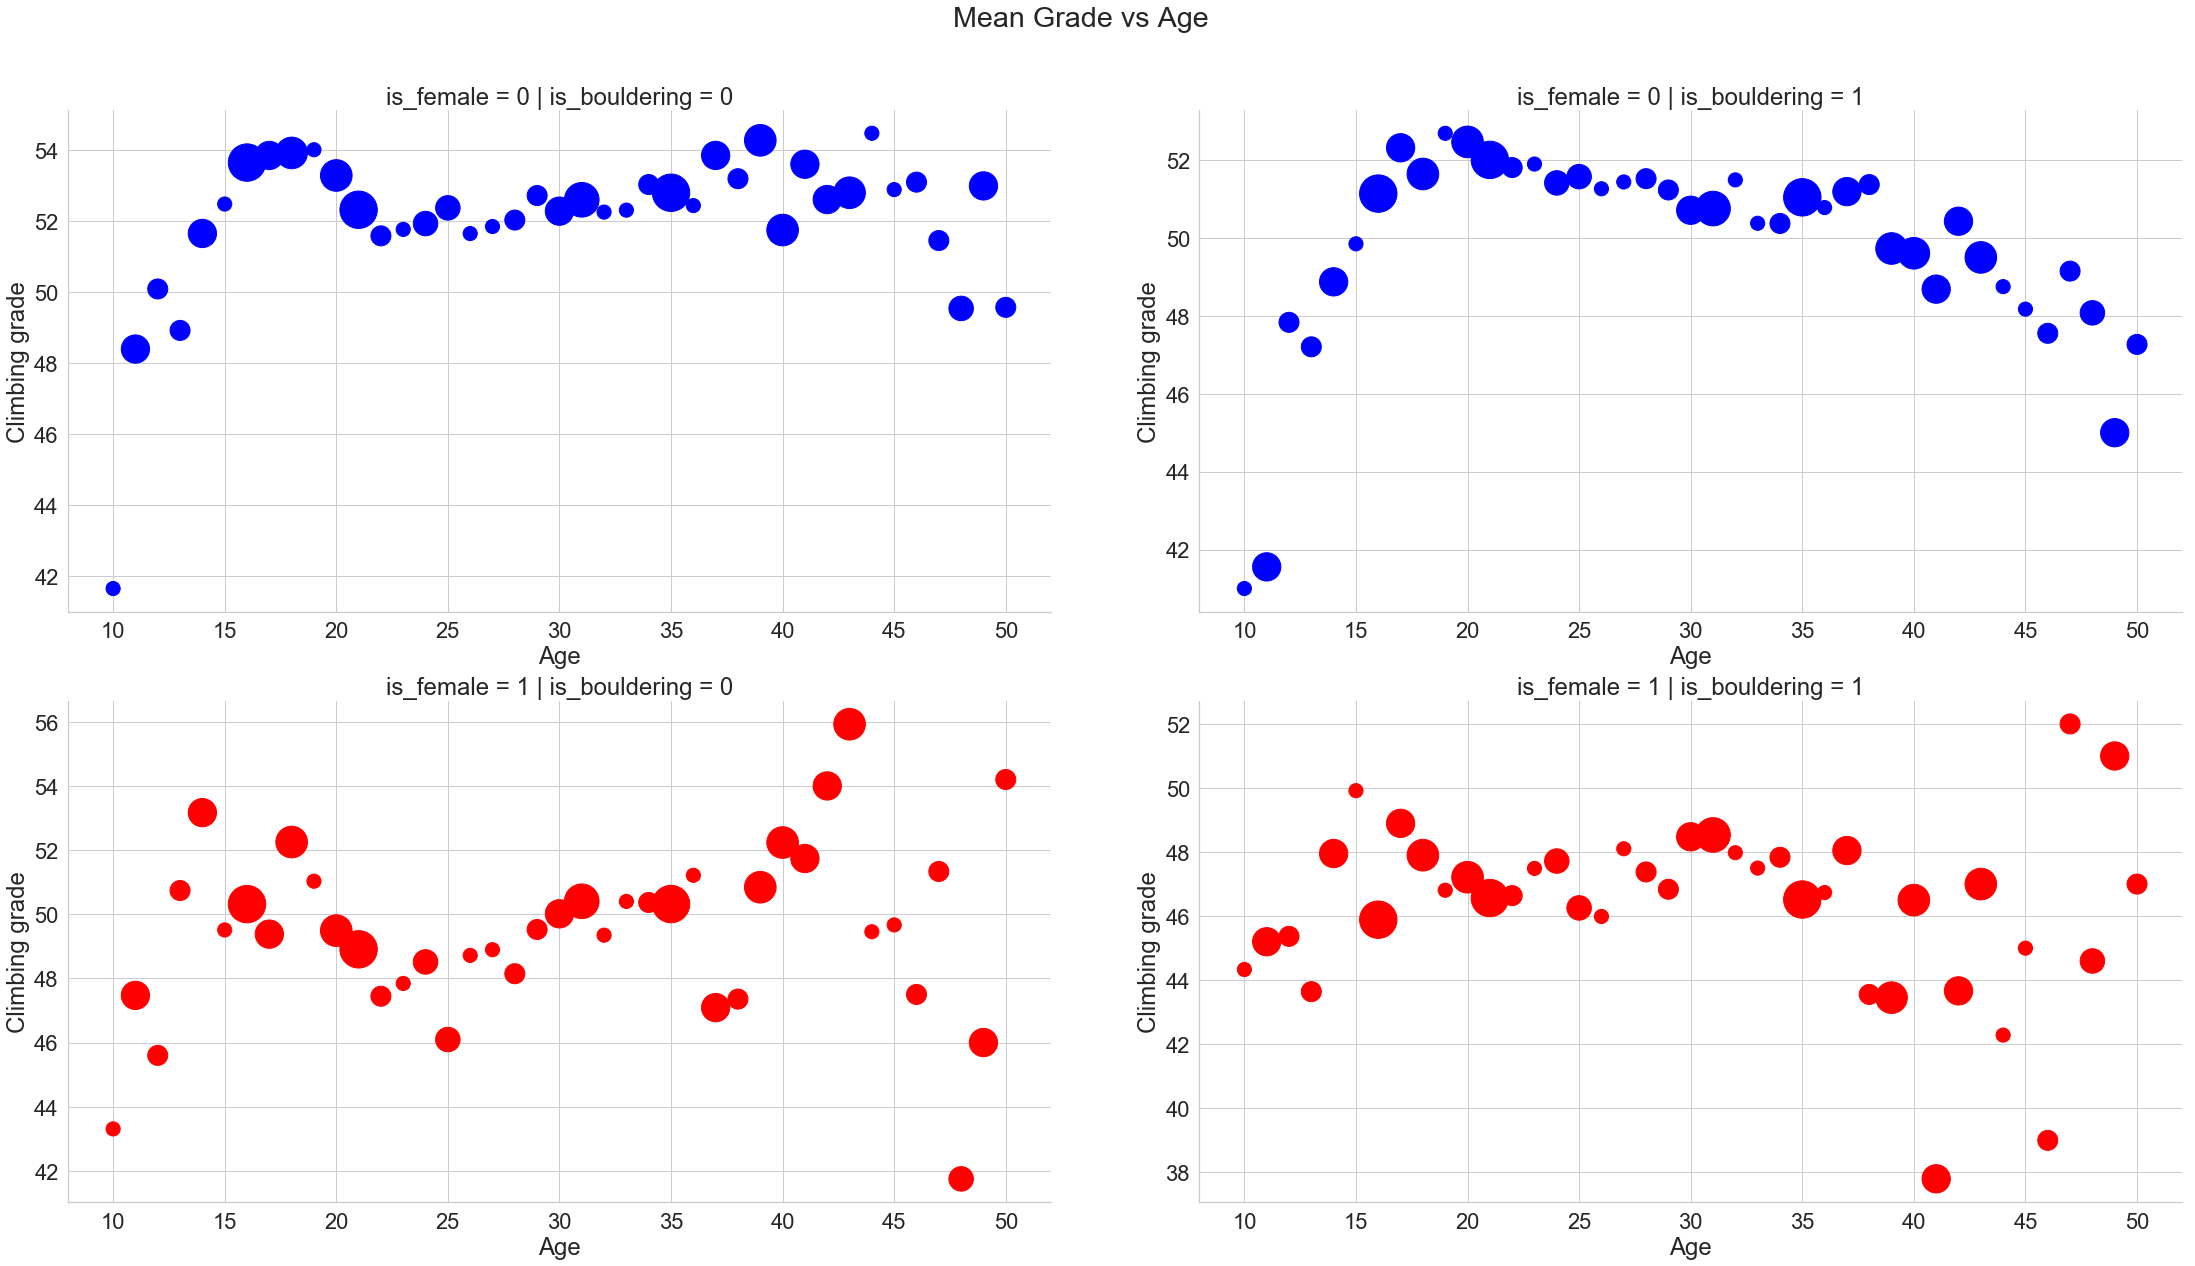

In [132]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='age', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'1',
                       's':200*df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                               .groupby(['age','index_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                       .groupby(by=['is_female','age','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','age','index_grade']])
g.fig.suptitle('Mean Grade vs Age')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [133]:
# ===================================
#
# STATISTICAL ANALYSES
#
# ===================================

In [134]:
# -----------------------------------
# UNIVARIATE ANALYSES

In [135]:
# ---- GRADE VS HEIGHT ----

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


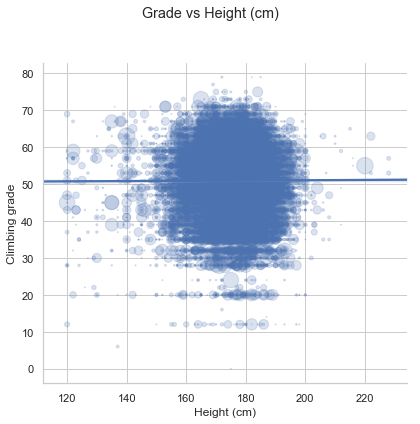

In [136]:
# Plot grade vs height
sns.set(style='whitegrid')
g = sns.lmplot(x='height', y='index_grade', height=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','index_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)])
g.fig.suptitle('Grade vs Height (cm)')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


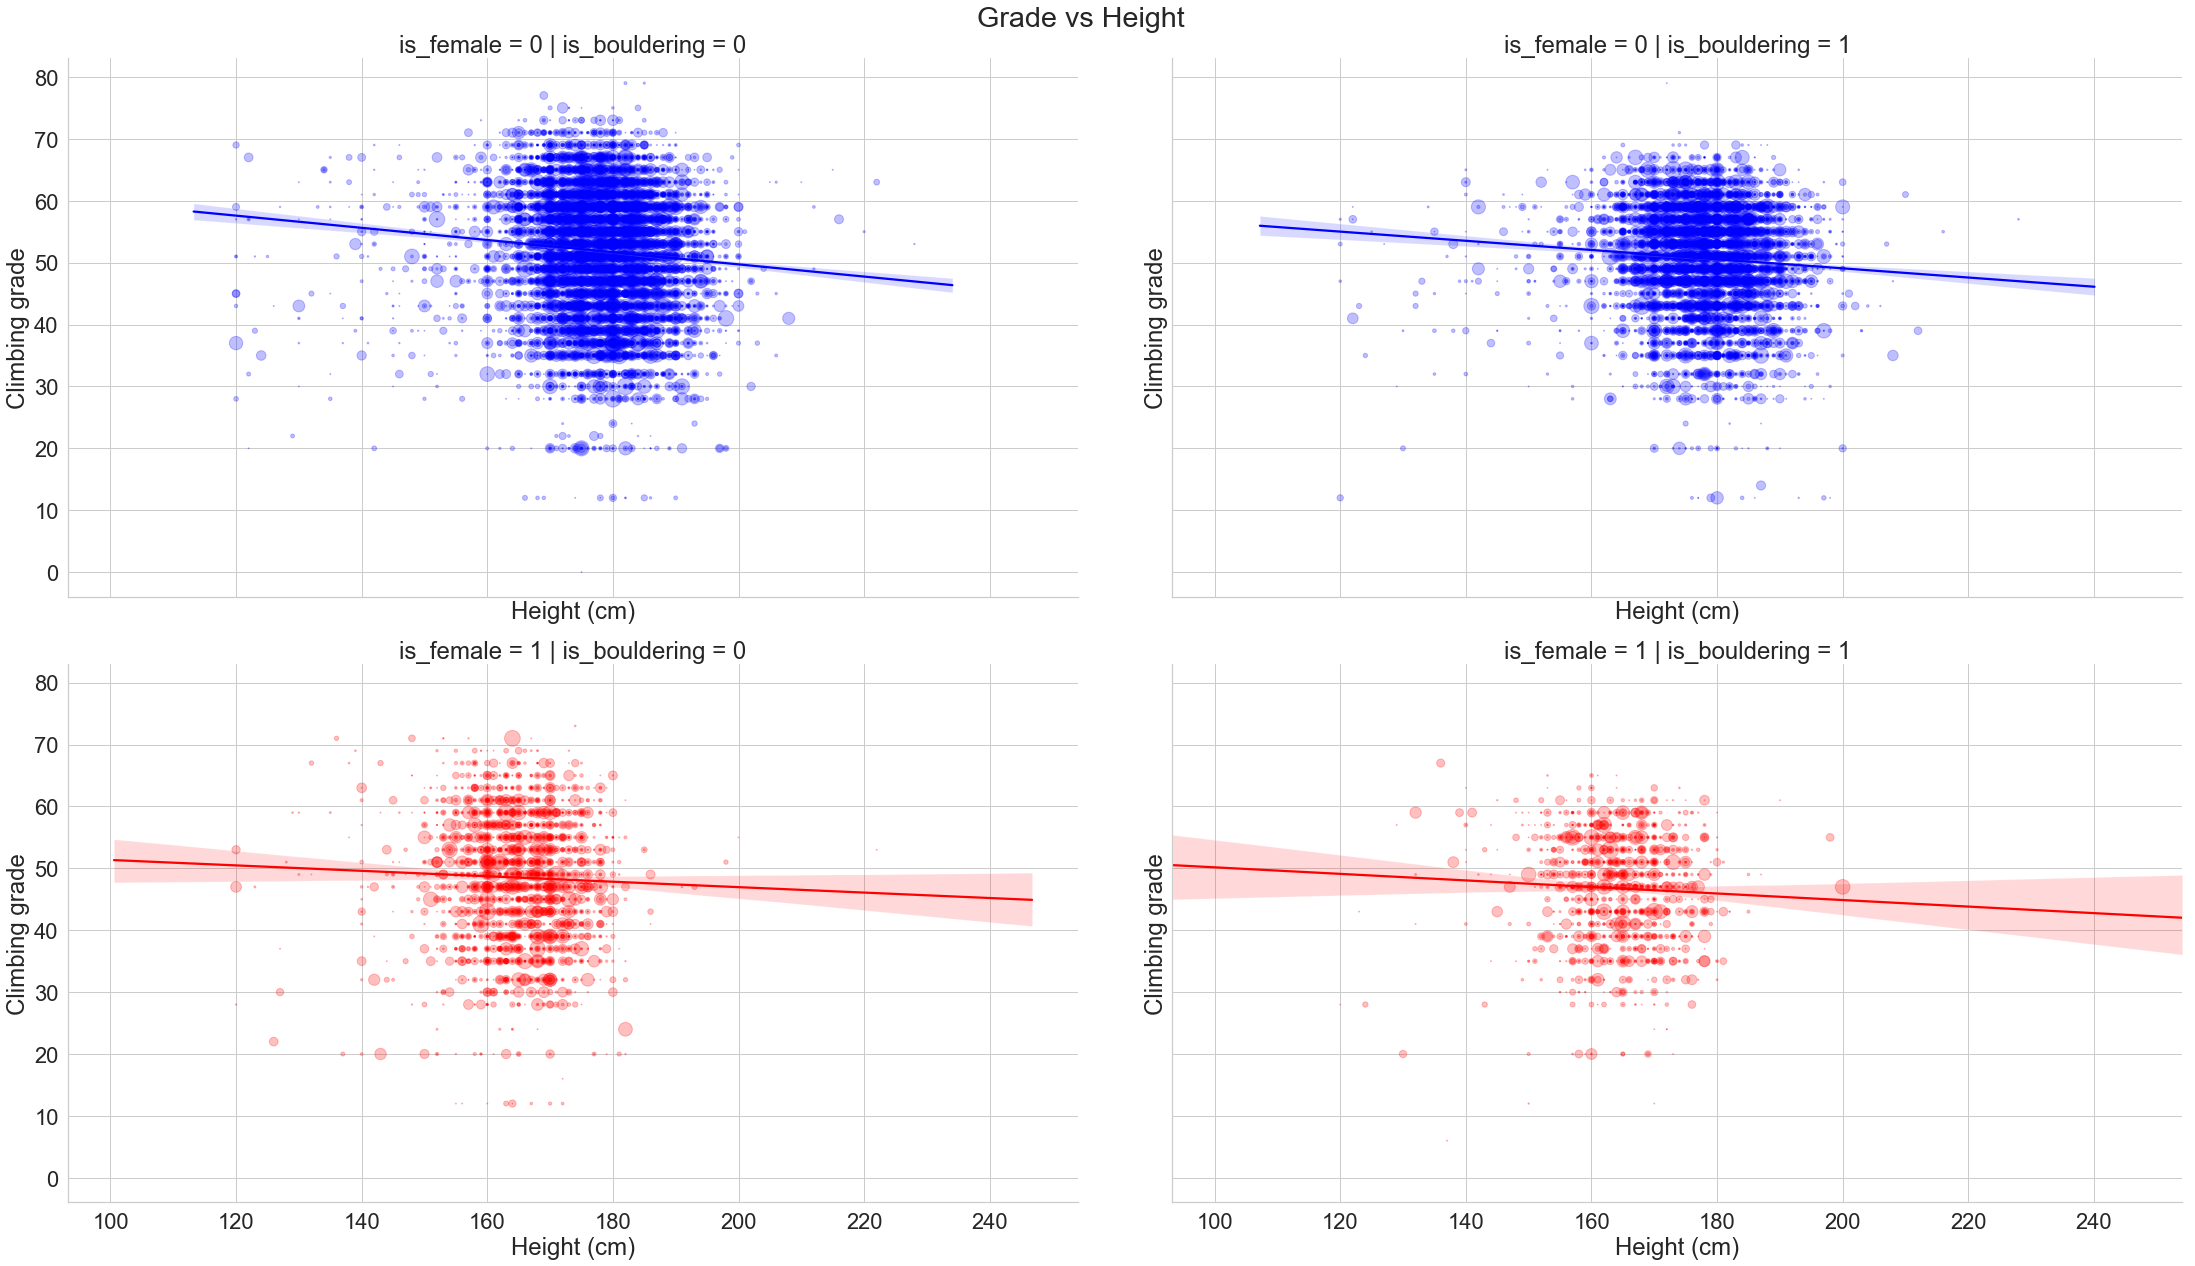

In [137]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='height', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.25',
                       's':1*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','index_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)])
g.fig.suptitle('Grade vs Height')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

In [138]:
df_results_univariate = pd.DataFrame(columns=['Variable','Type','Gender','Coefficient','Std_error','P_value'])

In [139]:
# Linear regression fit
lm_grade_vs_height_bouldering_female = \
        smf.ols('index_grade ~ height', 
                data=df_bouldering_female[
                    (df_bouldering_female['height'] >= 120) & 
                    (df_bouldering_female['height'] <= 240)]).fit()

print(lm_grade_vs_height_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_height_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_height_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_height_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.463
Date:                Sun, 24 Mar 2019   Prob (F-statistic):             0.0630
Time:                        16:37:49   Log-Likelihood:                -5179.1
No. Observations:                1462   AIC:                         1.036e+04
Df Residuals:                    1460   BIC:                         1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.4447      4.667     11.880      0.0

In [140]:
# Linear regression fit
lm_grade_vs_height_bouldering_male = \
        smf.ols('index_grade ~ height', 
                data=df_bouldering_male[
                    (df_bouldering_male['height'] >= 120) & 
                    (df_bouldering_male['height'] <= 240)]).fit()

print(lm_grade_vs_height_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_height_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_height_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_height_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     58.51
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           2.20e-14
Time:                        16:37:49   Log-Likelihood:                -37790.
No. Observations:               10878   AIC:                         7.558e+04
Df Residuals:                   10876   BIC:                         7.560e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.9107      1.725     37.044      0.0

In [141]:
# Linear regression fit
lm_grade_vs_height_rope_female = \
        smf.ols('index_grade ~ height', 
                data=df_rope_female[
                    (df_rope_female['height'] >= 120) & 
                    (df_rope_female['height'] <= 240)]).fit()

print(lm_grade_vs_height_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_height_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_height_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_height_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.237
Date:                Sun, 24 Mar 2019   Prob (F-statistic):             0.0721
Time:                        16:37:49   Log-Likelihood:                -10174.
No. Observations:                2738   AIC:                         2.035e+04
Df Residuals:                    2736   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.7418      4.025     13.847      0.0

In [142]:
# Linear regression fit
lm_grade_vs_height_rope_male = \
        smf.ols('index_grade ~ height', 
                data=df_rope_male[
                    (df_rope_male['height'] >= 120) & 
                    (df_rope_male['height'] <= 240)]).fit()

print(lm_grade_vs_height_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_height_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_height_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_height_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           5.95e-27
Time:                        16:37:50   Log-Likelihood:                -61126.
No. Observations:               16744   AIC:                         1.223e+05
Df Residuals:                   16742   BIC:                         1.223e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.4036      1.627     42.670      0.0

In [143]:
# Test that reducing the variable size removes the high condition number
df_test = df_rope_male.copy()
df_test['height'] = df_test['height']/100

lm_test = \
        smf.ols('index_grade ~ height', 
                data=df_test[
                    (df_test['height'] >= 1.20) & 
                    (df_test['height'] <= 2.40)]).fit()

print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           5.95e-27
Time:                        16:37:50   Log-Likelihood:                -61126.
No. Observations:               16744   AIC:                         1.223e+05
Df Residuals:                   16742   BIC:                         1.223e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.4036      1.627     42.670      0.0

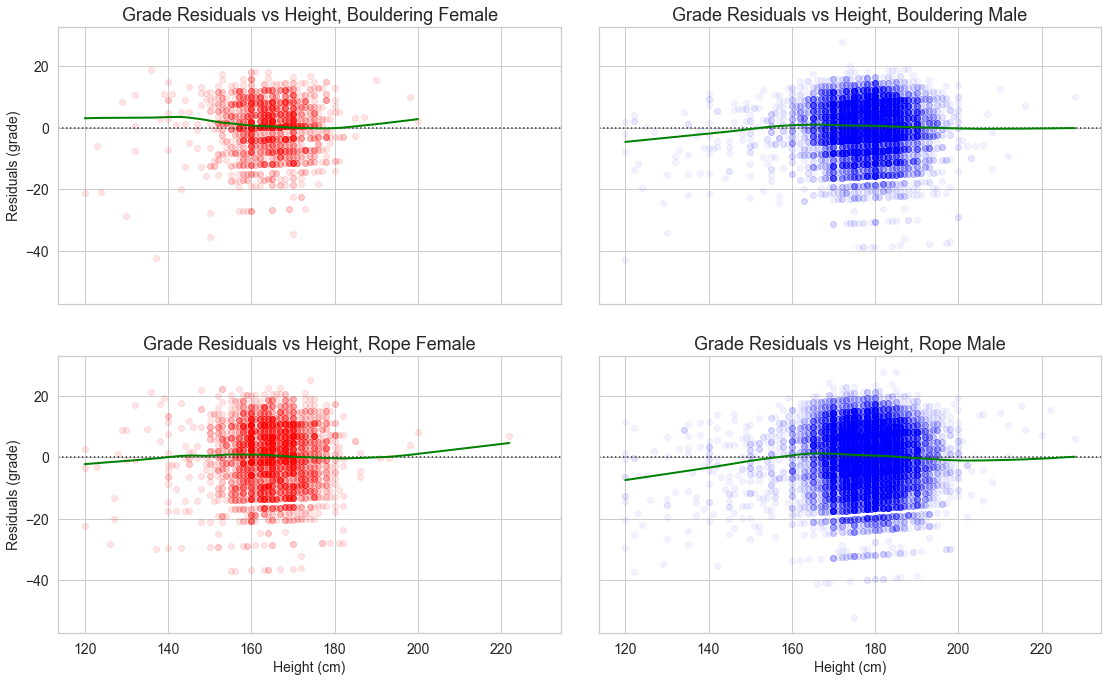

In [148]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, sharex=True, figsize=(16,10))

sns.residplot(x=df_bouldering_female[
                    (df_bouldering_female['height'] >= 120) & 
                    (df_bouldering_female['height'] <= 240)]['height'],
              y=df_bouldering_female[
                    (df_bouldering_female['height'] >= 120) & 
                    (df_bouldering_female['height'] <= 240)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax1, 
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_bouldering_male[
                    (df_bouldering_male['height'] >= 120) & 
                    (df_bouldering_male['height'] <= 240)]['height'],
              y=df_bouldering_male[
                    (df_bouldering_male['height'] >= 120) & 
                    (df_bouldering_male['height'] <= 240)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.05}, ax=ax2,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_female[
                    (df_rope_female['height'] >= 120) & 
                    (df_rope_female['height'] <= 240)]['height'],
              y=df_rope_female[
                    (df_rope_female['height'] >= 120) & 
                    (df_rope_female['height'] <= 240)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax3,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_male[
                    (df_rope_male['height'] >= 120) & 
                    (df_rope_male['height'] <= 240)]['height'],
              y=df_rope_male[
                    (df_rope_male['height'] >= 120) & 
                    (df_rope_male['height'] <= 240)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.05}, ax=ax4,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

ax1.set_title('Grade Residuals vs Height, Bouldering Female', fontsize=18)
ax2.set_title('Grade Residuals vs Height, Bouldering Male', fontsize=18)
ax3.set_title('Grade Residuals vs Height, Rope Female', fontsize=18)
ax4.set_title('Grade Residuals vs Height, Rope Male', fontsize=18)

ax3.set_xlabel('Height (cm)', fontsize=14)
ax4.set_xlabel('Height (cm)', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax2.set_xlabel('', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax3.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)
ax4.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

plt.tight_layout()

In [156]:
print(lm_grade_vs_height_bouldering_female.resid.mean())
print(lm_grade_vs_height_bouldering_male.resid.mean())
print(lm_grade_vs_height_rope_female.resid.mean())
print(lm_grade_vs_height_rope_male.resid.mean())

8.417647184244142e-15
3.3626999981306964e-14
3.215867633871133e-14
2.7078196350246053e-14


In [157]:
print(lm_grade_vs_height_bouldering_female.resid.sum())
print(lm_grade_vs_height_bouldering_male.resid.sum())
print(lm_grade_vs_height_rope_female.resid.sum())
print(lm_grade_vs_height_rope_male.resid.sum())

1.2875034371973015e-11
3.382183422218077e-10
9.890754881780595e-11
1.8394530343357474e-10


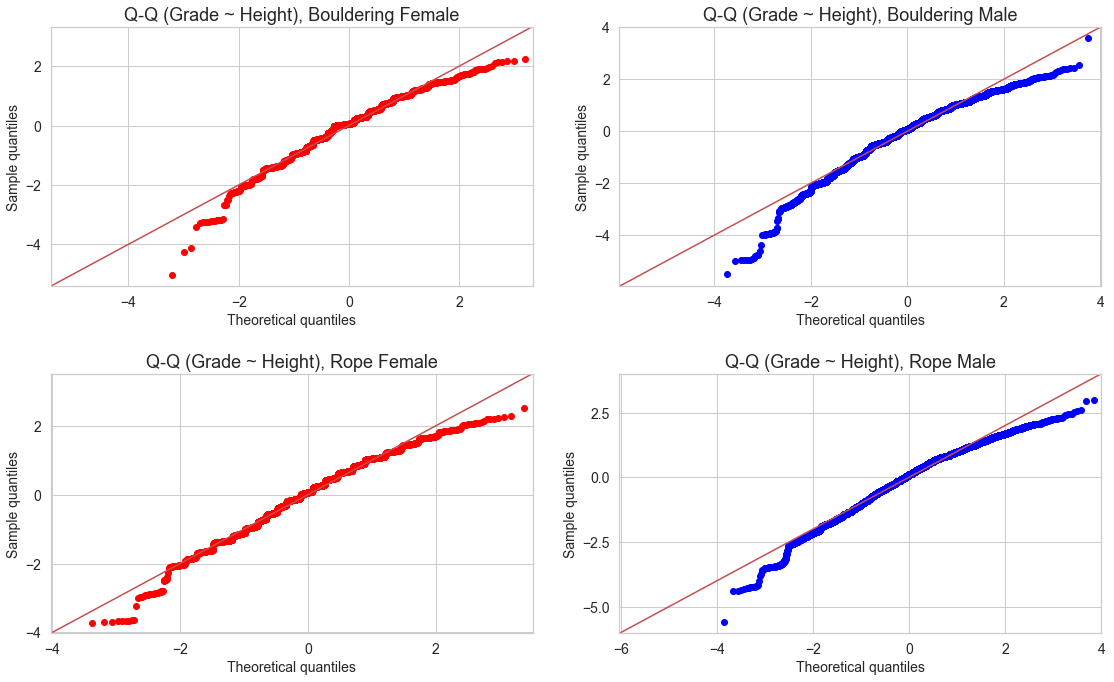

In [150]:
# QQ plots
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sm.qqplot(lm_grade_vs_height_bouldering_female.resid, line='45', fit=True, ax=ax[0,0], color='red')
sm.qqplot(lm_grade_vs_height_bouldering_male.resid, line='45', fit=True, ax=ax[0,1], color='blue')
sm.qqplot(lm_grade_vs_height_rope_female.resid, line='45', fit=True, ax=ax[1,0], color='red')
sm.qqplot(lm_grade_vs_height_rope_male.resid, line='45', fit=True, ax=ax[1,1], color='blue')

ax[0,0].set_title('Q-Q (Grade ~ Height), Bouldering Female', fontsize=18)
ax[0,1].set_title('Q-Q (Grade ~ Height), Bouldering Male', fontsize=18)
ax[1,0].set_title('Q-Q (Grade ~ Height), Rope Female', fontsize=18)
ax[1,1].set_title('Q-Q (Grade ~ Height), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[0,1].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,1].set_xlabel('Theoretical quantiles', fontsize=14)

ax[0,0].set_ylabel('Sample quantiles', fontsize=14)
ax[0,1].set_ylabel('Sample quantiles', fontsize=14)
ax[1,0].set_ylabel('Sample quantiles', fontsize=14)
ax[1,1].set_ylabel('Sample quantiles', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [152]:
# Residual histograms
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].hist(lm_grade_vs_height_bouldering_female.resid, bins=20, color='red')
ax[0,1].hist(lm_grade_vs_height_bouldering_male.resid, bins=20, color='blue')
ax[1,0].hist(lm_grade_vs_height_rope_female.resid, bins=20, color='red')
ax[1,1].hist(lm_grade_vs_height_rope_male.resid, bins=20, color='blue')

ax[0,0].set_title('Residuals Histogram (Grade ~ Height), Bouldering Female', fontsize=18)
ax[0,1].set_title('Residuals Histogram (Grade ~ Height), Bouldering Male', fontsize=18)
ax[1,0].set_title('Residuals Histogram (Grade ~ Height), Rope Female', fontsize=18)
ax[1,1].set_title('Residuals Histogram (Grade ~ Height), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Residual (grade)', fontsize=14)
ax[0,1].set_xlabel('Residual (grade)', fontsize=14)
ax[1,0].set_xlabel('Residual (grade)', fontsize=14)
ax[1,1].set_xlabel('Residual (grade)', fontsize=14)

ax[0,0].set_ylabel('Frequency', fontsize=14)
ax[0,1].set_ylabel('Frequency', fontsize=14)
ax[1,0].set_ylabel('Frequency', fontsize=14)
ax[1,1].set_ylabel('Frequency', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [160]:
# ---- GRADE VS WEIGHT ----

In [156]:
sns.set(style='whitegrid')
g = sns.lmplot(x='weight', y='index_grade', height=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['weight'] != 0)]\
                               .groupby(['weight','index_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)])
g.fig.suptitle('Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


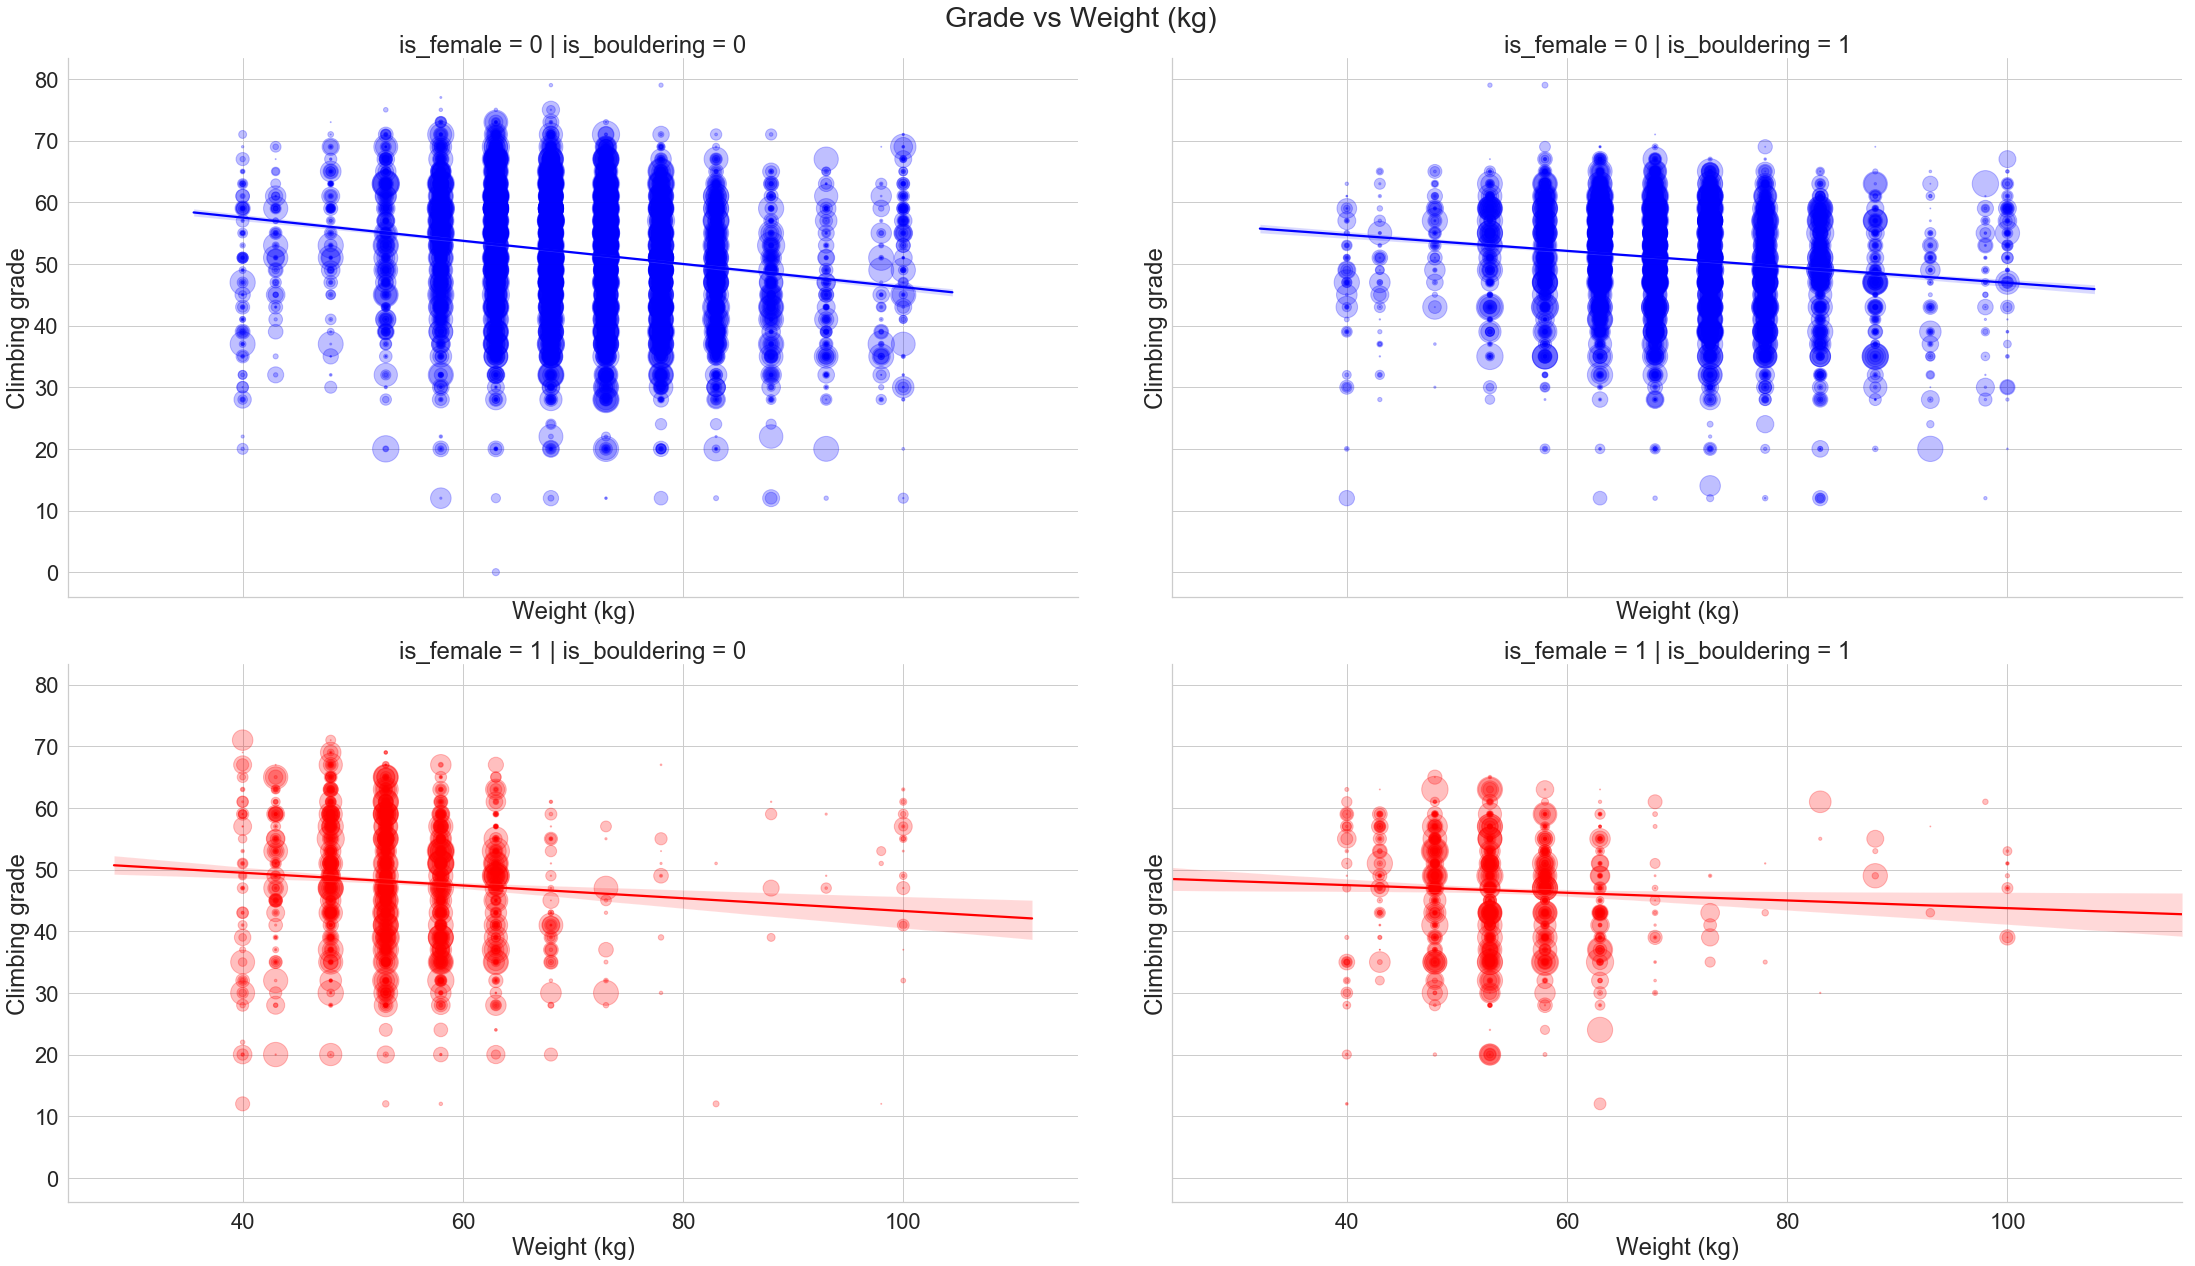

In [157]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='weight', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.25',
                       's':1*df_all[(df_all['weight'] != 0)]\
                               .groupby(['weight','index_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)])
g.fig.suptitle('Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

In [158]:
# Linear regression fit
lm_grade_vs_weight_bouldering_female = \
        smf.ols('index_grade ~ weight', 
                data=df_bouldering_female[
                    (df_bouldering_female['weight'] != 0)]).fit()

print(lm_grade_vs_weight_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_weight_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_weight_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_weight_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.842
Date:                Sun, 24 Mar 2019   Prob (F-statistic):             0.0280
Time:                        16:49:28   Log-Likelihood:                -4396.6
No. Observations:                1237   AIC:                             8797.
Df Residuals:                    1235   BIC:                             8807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9737      1.558     32.071      0.0

In [159]:
# Linear regression fit
lm_grade_vs_weight_bouldering_male = \
        smf.ols('index_grade ~ weight', 
                data=df_bouldering_male[
                    (df_bouldering_male['weight'] != 0)]).fit()

print(lm_grade_vs_weight_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_weight_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_weight_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_weight_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     257.3
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           2.79e-57
Time:                        16:49:31   Log-Likelihood:                -40034.
No. Observations:               11547   AIC:                         8.007e+04
Df Residuals:                   11545   BIC:                         8.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.8870      0.568    105.389      0.0

In [160]:
# Linear regression fit
lm_grade_vs_weight_rope_female = \
        smf.ols('index_grade ~ weight', 
                data=df_rope_female[
                    (df_rope_female['weight'] != 0)]).fit()

print(lm_grade_vs_weight_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_weight_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_weight_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_weight_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           3.70e-05
Time:                        16:49:32   Log-Likelihood:                -8454.1
No. Observations:                2278   AIC:                         1.691e+04
Df Residuals:                    2276   BIC:                         1.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6306      1.377     38.945      0.0

In [161]:
# Linear regression fit
lm_grade_vs_weight_rope_male = \
        smf.ols('index_grade ~ weight', 
                data=df_rope_male[
                    (df_rope_male['weight'] != 0)]).fit()

print(lm_grade_vs_weight_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_weight_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_weight_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_weight_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     599.5
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          3.60e-130
Time:                        16:49:33   Log-Likelihood:                -62655.
No. Observations:               17219   AIC:                         1.253e+05
Df Residuals:                   17217   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0288      0.543    119.816      0.0

In [162]:
'''# Test that reducing the variable size removes the high condition number
df_test = df_rope_male.copy()
df_test['height'] = df_test['height']/100

lm_test = \
        smf.ols('id_grade ~ height', 
                data=df_test[
                    (df_test['height'] >= 1.20) & 
                    (df_test['height'] <= 2.40)]).fit()

print(lm_test.summary())'''


"# Test that reducing the variable size removes the high condition number\ndf_test = df_rope_male.copy()\ndf_test['height'] = df_test['height']/100\n\nlm_test =         smf.ols('id_grade ~ height', \n                data=df_test[\n                    (df_test['height'] >= 1.20) & \n                    (df_test['height'] <= 2.40)]).fit()\n\nprint(lm_test.summary())"

In [163]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, sharex=True, figsize=(16,10))

sns.residplot(x=df_bouldering_female[
                    (df_bouldering_female['weight'] != 0)]['weight'],
              y=df_bouldering_female[
                    (df_bouldering_female['weight'] != 0)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax1, 
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_bouldering_male[
                    (df_bouldering_male['weight'] != 0)]['weight'],
              y=df_bouldering_male[
                    (df_bouldering_male['weight'] != 0)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax2,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_female[
                    (df_rope_female['weight'] != 0)]['weight'],
              y=df_rope_female[
                    (df_rope_female['weight'] != 0)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax3,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_male[
                    (df_rope_male['weight'] != 0)]['weight'],
              y=df_rope_male[
                    (df_rope_male['weight'] != 0)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax4,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

ax1.set_title('Grade Residuals vs Weight, Bouldering Female', fontsize=18)
ax2.set_title('Grade Residuals vs Weight, Bouldering Male', fontsize=18)
ax3.set_title('Grade Residuals vs Weight, Rope Female', fontsize=18)
ax4.set_title('Grade Residuals vs Weight, Rope Male', fontsize=18)

ax3.set_xlabel('Weight (kg)', fontsize=14)
ax4.set_xlabel('Weight (kg)', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax2.set_xlabel('', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax3.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)
ax4.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

plt.tight_layout()

In [164]:
print(lm_grade_vs_weight_bouldering_female.resid.mean())
print(lm_grade_vs_weight_bouldering_male.resid.mean())
print(lm_grade_vs_weight_rope_female.resid.mean())
print(lm_grade_vs_weight_rope_male.resid.mean())

5.634942795316558e-15
7.836768867474457e-14
-1.429195265694811e-14
1.0998536357110316e-13


In [165]:
print(lm_grade_vs_weight_bouldering_female.resid.sum())
print(lm_grade_vs_weight_bouldering_male.resid.sum())
print(lm_grade_vs_weight_rope_female.resid.sum())
print(lm_grade_vs_weight_rope_male.resid.sum())

5.144329406903125e-12
7.79891706770286e-10
-5.854872142663226e-11
1.355147105641663e-09


In [166]:
# QQ plots
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sm.qqplot(lm_grade_vs_weight_bouldering_female.resid, line='45', fit=True, ax=ax[0,0], color='red')
sm.qqplot(lm_grade_vs_weight_bouldering_male.resid, line='45', fit=True, ax=ax[0,1], color='blue')
sm.qqplot(lm_grade_vs_weight_rope_female.resid, line='45', fit=True, ax=ax[1,0], color='red')
sm.qqplot(lm_grade_vs_weight_rope_male.resid, line='45', fit=True, ax=ax[1,1], color='blue')

ax[0,0].set_title('Q-Q (Grade ~ Weight), Bouldering Female', fontsize=18)
ax[0,1].set_title('Q-Q (Grade ~ Weight), Bouldering Male', fontsize=18)
ax[1,0].set_title('Q-Q (Grade ~ Weight), Rope Female', fontsize=18)
ax[1,1].set_title('Q-Q (Grade ~ Weight), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[0,1].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,1].set_xlabel('Theoretical quantiles', fontsize=14)

ax[0,0].set_ylabel('Sample quantiles', fontsize=14)
ax[0,1].set_ylabel('Sample quantiles', fontsize=14)
ax[1,0].set_ylabel('Sample quantiles', fontsize=14)
ax[1,1].set_ylabel('Sample quantiles', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

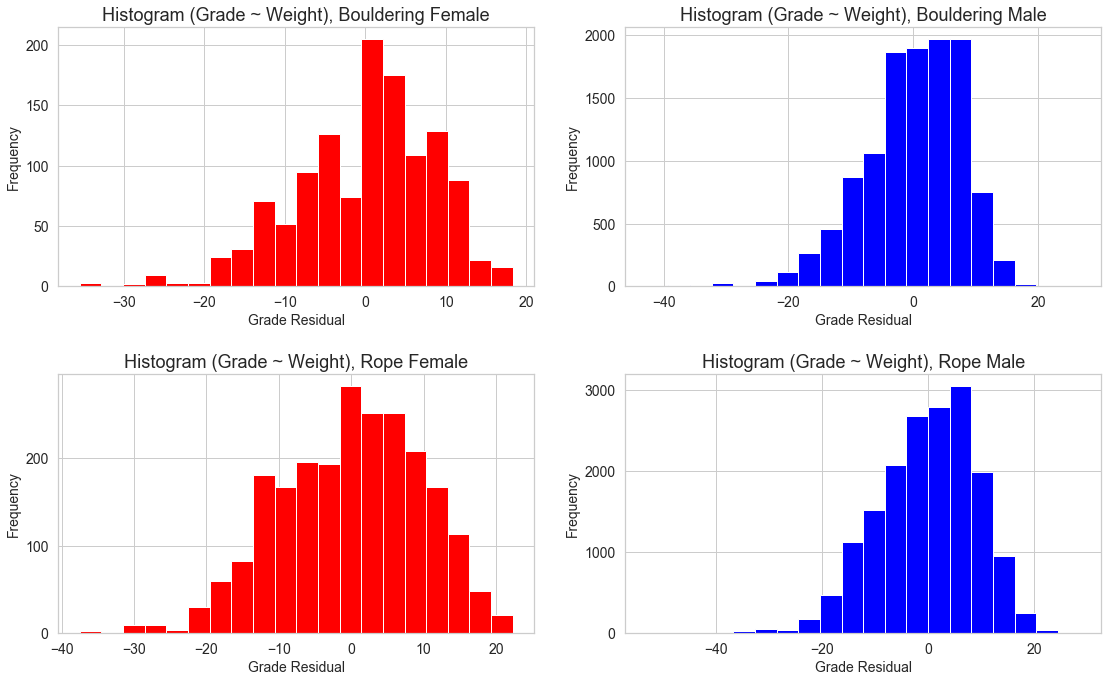

In [167]:
# Residual histograms
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].hist(lm_grade_vs_weight_bouldering_female.resid, bins=20, color='red')
ax[0,1].hist(lm_grade_vs_weight_bouldering_male.resid, bins=20, color='blue')
ax[1,0].hist(lm_grade_vs_weight_rope_female.resid, bins=20, color='red')
ax[1,1].hist(lm_grade_vs_weight_rope_male.resid, bins=20, color='blue')

ax[0,0].set_title('Histogram (Grade ~ Weight), Bouldering Female', fontsize=18)
ax[0,1].set_title('Histogram (Grade ~ Weight), Bouldering Male', fontsize=18)
ax[1,0].set_title('Histogram (Grade ~ Weight), Rope Female', fontsize=18)
ax[1,1].set_title('Histogram (Grade ~ Weight), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Grade Residual', fontsize=14)
ax[0,1].set_xlabel('Grade Residual', fontsize=14)
ax[1,0].set_xlabel('Grade Residual', fontsize=14)
ax[1,1].set_xlabel('Grade Residual', fontsize=14)

ax[0,0].set_ylabel('Frequency', fontsize=14)
ax[0,1].set_ylabel('Frequency', fontsize=14)
ax[1,0].set_ylabel('Frequency', fontsize=14)
ax[1,1].set_ylabel('Frequency', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [168]:
# ---- GRADE VS AGE ----

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


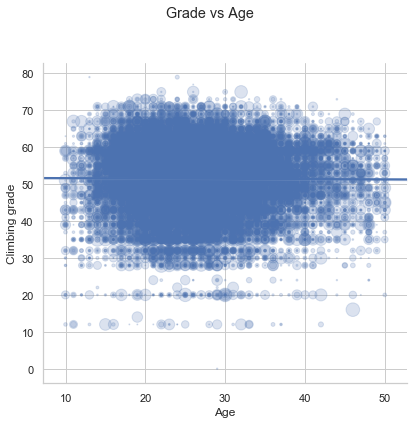

In [169]:
sns.set(style='whitegrid')
g = sns.lmplot(x='age', y='index_grade', height=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['age'] >= 10) &
                                 (df_all['age'] <= 50)]\
                               .groupby(['age','index_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) &
                          (df_all['age'] <= 50)])
g.fig.suptitle('Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


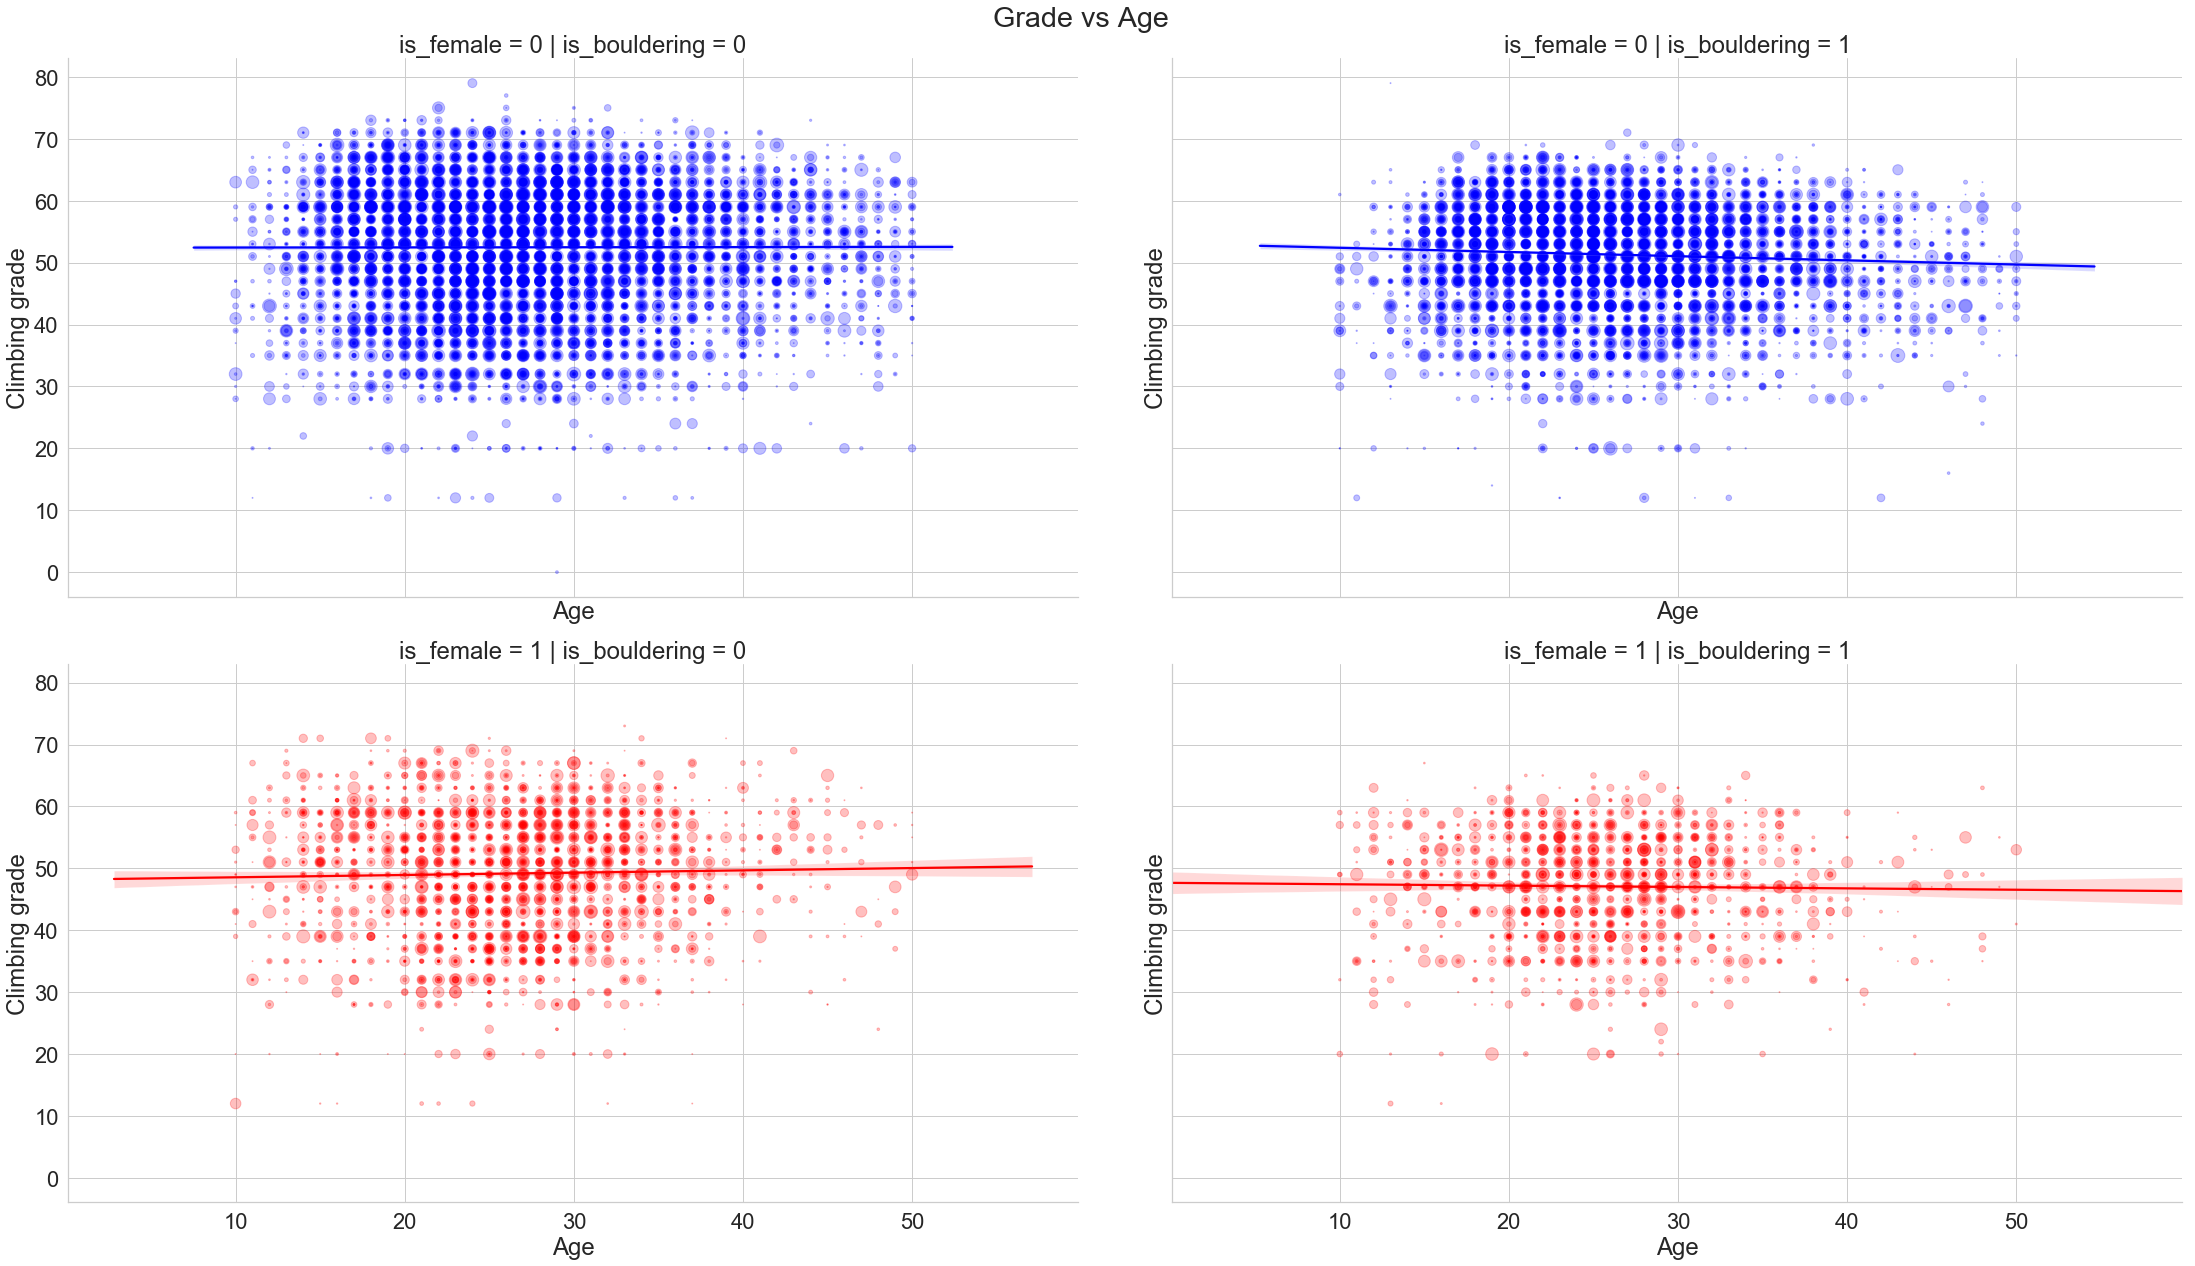

In [170]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='age', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.25',
                       's':1*df_all[(df_all['age'] >= 10) &
                                   (df_all['age'] <= 50)]\
                               .groupby(['age','index_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) &
                           (df_all['age'] <= 50)])
g.fig.suptitle('Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

In [171]:
# Linear regression fit
lm_grade_vs_age_bouldering_female = \
        smf.ols('index_grade ~ age', 
                data=df_bouldering_female[
                    (df_bouldering_female['age'] >= 10) &
                    (df_bouldering_female['age'] <= 50)
                ]).fit()

print(lm_grade_vs_age_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_age_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_age_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_age_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5043
Date:                Sun, 24 Mar 2019   Prob (F-statistic):              0.478
Time:                        16:51:06   Log-Likelihood:                -5600.2
No. Observations:                1583   AIC:                         1.120e+04
Df Residuals:                    1581   BIC:                         1.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6509      0.837     56.912      0.0

In [172]:
# Linear regression fit
lm_grade_vs_age_bouldering_male = \
        smf.ols('index_grade ~ age', 
                data=df_bouldering_male[
                    (df_bouldering_male['age'] >= 10) &
                    (df_bouldering_male['age'] <= 50)
                ]).fit()

print(lm_grade_vs_age_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_age_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_age_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_age_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.98
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           1.24e-09
Time:                        16:51:07   Log-Likelihood:                -38008.
No. Observations:               10944   AIC:                         7.602e+04
Df Residuals:                   10942   BIC:                         7.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0749      0.301    176.113      0.0

In [173]:
# Linear regression fit
lm_grade_vs_age_rope_female = \
        smf.ols('index_grade ~ age', 
                data=df_rope_female[
                    (df_rope_female['age'] >= 10) &
                    (df_rope_female['age'] <= 50)
                ]).fit()

print(lm_grade_vs_age_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_age_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_age_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_age_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.900
Date:                Sun, 24 Mar 2019   Prob (F-statistic):              0.168
Time:                        16:51:08   Log-Likelihood:                -10124.
No. Observations:                2728   AIC:                         2.025e+04
Df Residuals:                    2726   BIC:                         2.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.1783      0.739     65.154      0.0

In [174]:
# Linear regression fit
lm_grade_vs_age_rope_male = \
        smf.ols('index_grade ~ age', 
                data=df_rope_male[
                    (df_rope_male['age'] >= 10) &
                    (df_rope_male['age'] <= 50)
                ]).fit()

print(lm_grade_vs_age_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_age_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_age_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_age_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05513
Date:                Sun, 24 Mar 2019   Prob (F-statistic):              0.814
Time:                        16:51:09   Log-Likelihood:                -57119.
No. Observations:               15594   AIC:                         1.142e+05
Df Residuals:                   15592   BIC:                         1.143e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4150      0.292    179.345      0.0

In [175]:
'''# Test that reducing the variable size removes the high condition number
df_test = df_rope_male.copy()
df_test['height'] = df_test['height']/100

lm_test = \
        smf.ols('id_grade ~ height', 
                data=df_test[
                    (df_test['height'] >= 1.20) & 
                    (df_test['height'] <= 2.40)]).fit()

print(lm_test.summary())'''

"# Test that reducing the variable size removes the high condition number\ndf_test = df_rope_male.copy()\ndf_test['height'] = df_test['height']/100\n\nlm_test =         smf.ols('id_grade ~ height', \n                data=df_test[\n                    (df_test['height'] >= 1.20) & \n                    (df_test['height'] <= 2.40)]).fit()\n\nprint(lm_test.summary())"

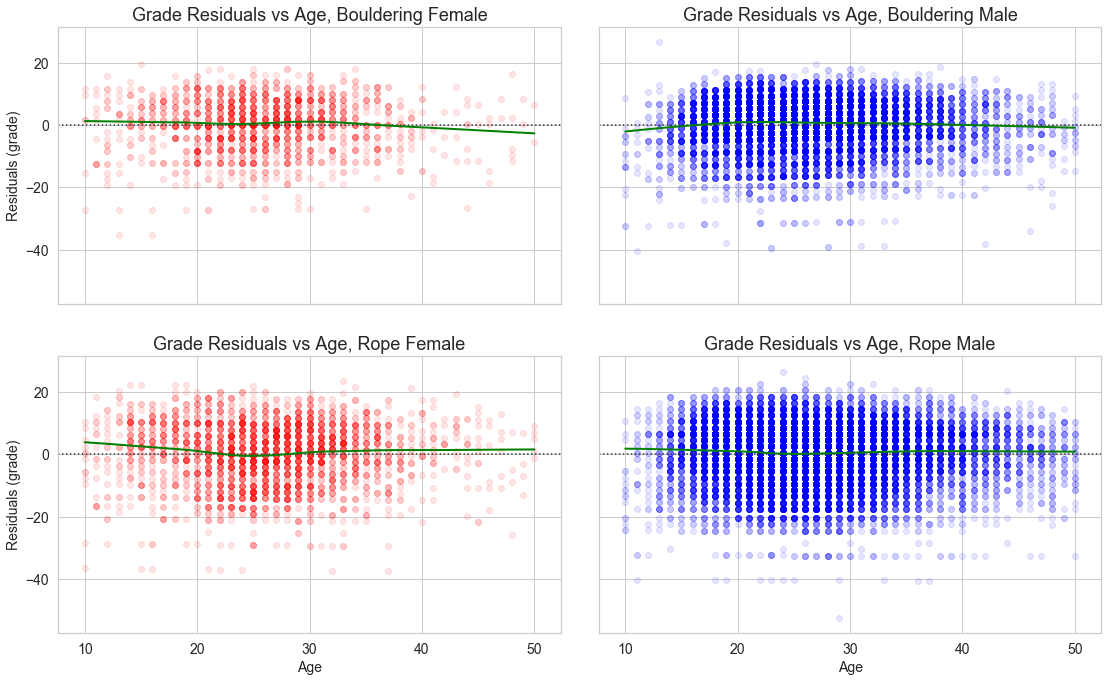

In [176]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, sharex=True, figsize=(16,10))

sns.residplot(x=df_bouldering_female[
                    (df_bouldering_female['age'] >= 10) &
                    (df_bouldering_female['age'] <= 50)]['age'],
              y=df_bouldering_female[
                    (df_bouldering_female['age'] >= 10) &
                    (df_bouldering_female['age'] <= 50)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax1, 
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_bouldering_male[
                    (df_bouldering_male['age'] >= 10) &
                    (df_bouldering_male['age'] <= 50)]['age'],
              y=df_bouldering_male[
                    (df_bouldering_male['age'] >= 10) &
                    (df_bouldering_male['age'] <= 50)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax2,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_female[
                    (df_rope_female['age'] >= 10) &
                    (df_rope_female['age'] <= 50)]['age'],
              y=df_rope_female[
                    (df_rope_female['age'] >= 10) &
                    (df_rope_female['age'] <= 50)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax3,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_male[
                    (df_rope_male['age'] >= 10) &
                    (df_rope_male['age'] <= 50)]['age'],
              y=df_rope_male[
                    (df_rope_male['age'] >= 10) &
                    (df_rope_male['age'] <= 50)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax4,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

ax1.set_title('Grade Residuals vs Age, Bouldering Female', fontsize=18)
ax2.set_title('Grade Residuals vs Age, Bouldering Male', fontsize=18)
ax3.set_title('Grade Residuals vs Age, Rope Female', fontsize=18)
ax4.set_title('Grade Residuals vs Age, Rope Male', fontsize=18)

ax3.set_xlabel('Age', fontsize=14)
ax4.set_xlabel('Age', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax2.set_xlabel('', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax3.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)
ax4.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

plt.tight_layout()

In [177]:
print(lm_grade_vs_age_bouldering_female.resid.mean())
print(lm_grade_vs_age_bouldering_male.resid.mean())
print(lm_grade_vs_age_rope_female.resid.mean())
print(lm_grade_vs_age_rope_male.resid.mean())

5.82618111823506e-15
4.847194770319587e-14
1.4609362921108512e-14
-3.165911236587631e-14


In [178]:
print(lm_grade_vs_age_bouldering_female.resid.sum())
print(lm_grade_vs_age_bouldering_male.resid.sum())
print(lm_grade_vs_age_rope_female.resid.sum())
print(lm_grade_vs_age_rope_male.resid.sum())

7.560174708487466e-12
5.00676833325997e-10
3.83124643121846e-11
3.4560798667371273e-10


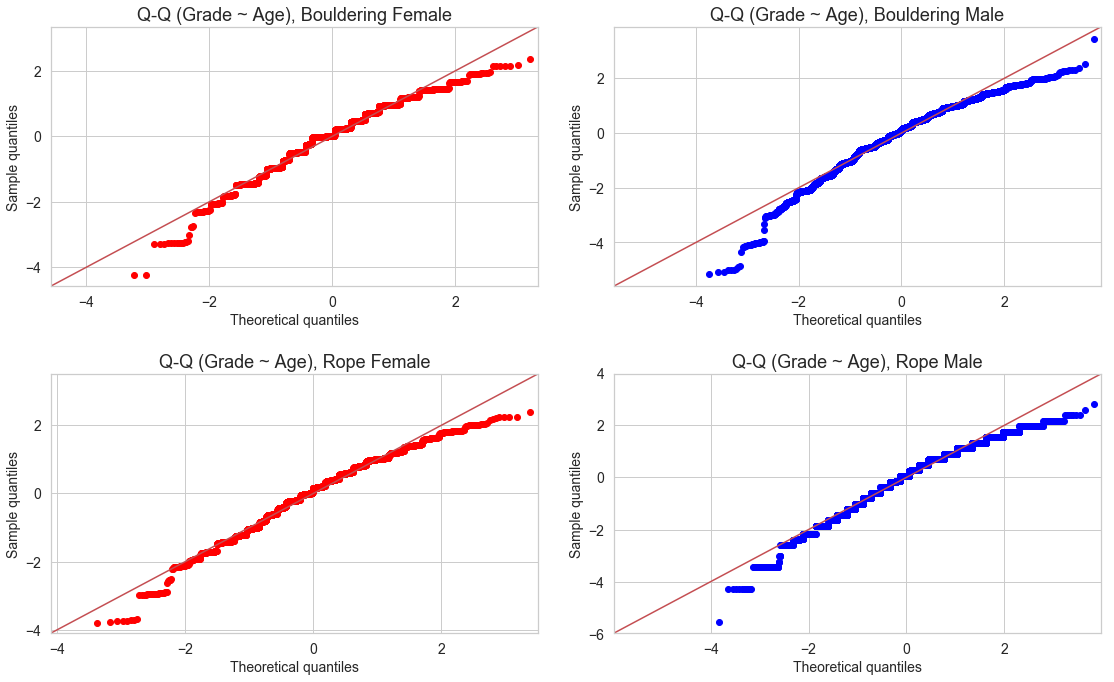

In [179]:
# QQ plots
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sm.qqplot(lm_grade_vs_age_bouldering_female.resid, line='45', fit=True, ax=ax[0,0], color='red')
sm.qqplot(lm_grade_vs_age_bouldering_male.resid, line='45', fit=True, ax=ax[0,1], color='blue')
sm.qqplot(lm_grade_vs_age_rope_female.resid, line='45', fit=True, ax=ax[1,0], color='red')
sm.qqplot(lm_grade_vs_age_rope_male.resid, line='45', fit=True, ax=ax[1,1], color='blue')

ax[0,0].set_title('Q-Q (Grade ~ Age), Bouldering Female', fontsize=18)
ax[0,1].set_title('Q-Q (Grade ~ Age), Bouldering Male', fontsize=18)
ax[1,0].set_title('Q-Q (Grade ~ Age), Rope Female', fontsize=18)
ax[1,1].set_title('Q-Q (Grade ~ Age), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[0,1].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,1].set_xlabel('Theoretical quantiles', fontsize=14)

ax[0,0].set_ylabel('Sample quantiles', fontsize=14)
ax[0,1].set_ylabel('Sample quantiles', fontsize=14)
ax[1,0].set_ylabel('Sample quantiles', fontsize=14)
ax[1,1].set_ylabel('Sample quantiles', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

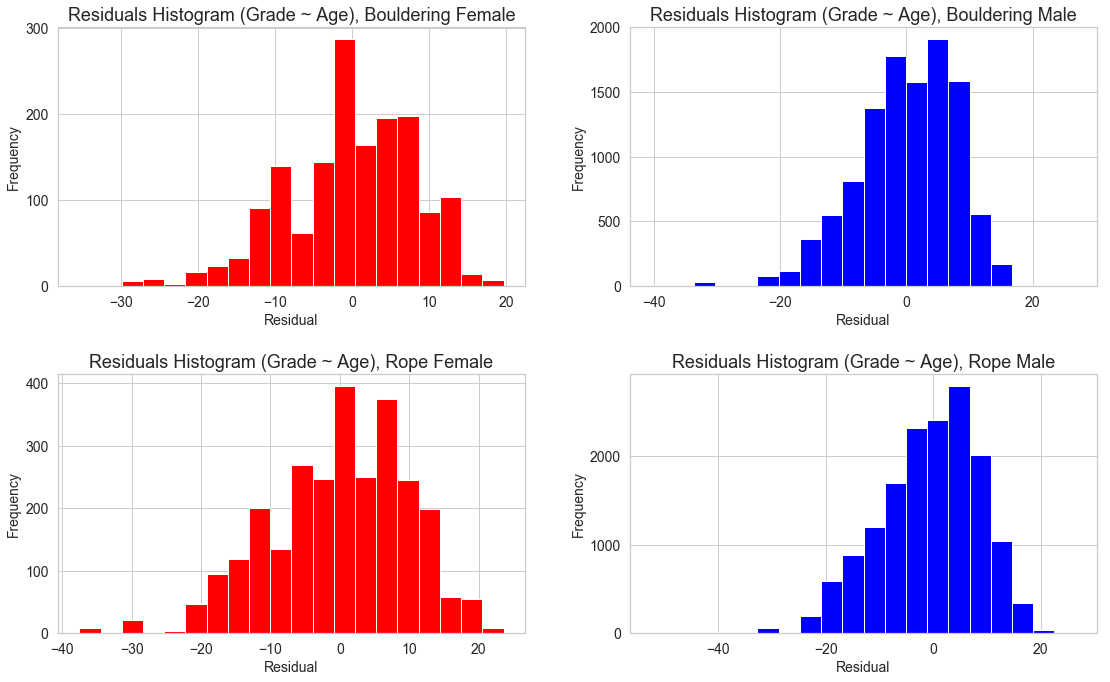

In [180]:
# Residual histograms
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].hist(lm_grade_vs_age_bouldering_female.resid, bins=20, color='red')
ax[0,1].hist(lm_grade_vs_age_bouldering_male.resid, bins=20, color='blue')
ax[1,0].hist(lm_grade_vs_age_rope_female.resid, bins=20, color='red')
ax[1,1].hist(lm_grade_vs_age_rope_male.resid, bins=20, color='blue')

ax[0,0].set_title('Residuals Histogram (Grade ~ Age), Bouldering Female', fontsize=18)
ax[0,1].set_title('Residuals Histogram (Grade ~ Age), Bouldering Male', fontsize=18)
ax[1,0].set_title('Residuals Histogram (Grade ~ Age), Rope Female', fontsize=18)
ax[1,1].set_title('Residuals Histogram (Grade ~ Age), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Residual', fontsize=14)
ax[0,1].set_xlabel('Residual', fontsize=14)
ax[1,0].set_xlabel('Residual', fontsize=14)
ax[1,1].set_xlabel('Residual', fontsize=14)

ax[0,0].set_ylabel('Frequency', fontsize=14)
ax[0,1].set_ylabel('Frequency', fontsize=14)
ax[1,0].set_ylabel('Frequency', fontsize=14)
ax[1,1].set_ylabel('Frequency', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [181]:
# ---- GRADE VS YEARS_CLIMBING ----

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


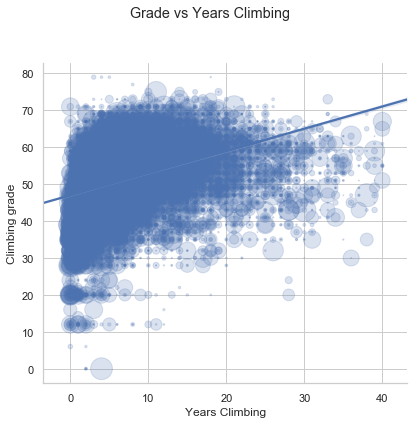

In [182]:
sns.set(style='whitegrid')
g = sns.lmplot(x='years_climbing', y='index_grade', height=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['years_climbing'] >= 0) &
                                 (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','index_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) &
                          (df_all['years_climbing'] <= 40)])
g.fig.suptitle('Grade vs Years Climbing')
g.set(xlabel='Years Climbing', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [183]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='years_climbing', y='index_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               height=10, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.25',
                       's':1*df_all[(df_all['years_climbing'] >= 0) &
                                   (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','index_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) &
                           (df_all['years_climbing'] <= 40)])
g.fig.suptitle('Grade vs Years Climbing')
g.set(xlabel='Years climbing', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [184]:
# Linear regression fit
lm_grade_vs_years_climbing_bouldering_female = \
        smf.ols('index_grade ~ years_climbing', 
                data=df_bouldering_female[
                    (df_bouldering_female['years_climbing'] >= 0) &
                    (df_bouldering_female['years_climbing'] <= 40)
                ]).fit()

print(lm_grade_vs_years_climbing_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_years_climbing_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     472.7
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           3.56e-93
Time:                        16:53:05   Log-Likelihood:                -6147.5
No. Observations:                1788   AIC:                         1.230e+04
Df Residuals:                    1786   BIC:                         1.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.6409      0.286    145.

In [185]:
# Linear regression fit
lm_grade_vs_years_climbing_bouldering_male = \
        smf.ols('index_grade ~ years_climbing', 
                data=df_bouldering_male[
                    (df_bouldering_male['years_climbing'] >= 0) &
                    (df_bouldering_male['years_climbing'] <= 40)
                ]).fit()

print(lm_grade_vs_years_climbing_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_years_climbing_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1202.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          1.05e-251
Time:                        16:53:06   Log-Likelihood:                -43655.
No. Observations:               12677   AIC:                         8.731e+04
Df Residuals:                   12675   BIC:                         8.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         48.1700      0.105    458.

In [186]:
# Linear regression fit
lm_grade_vs_years_climbing_rope_female = \
        smf.ols('index_grade ~ years_climbing', 
                data=df_rope_female[
                    (df_rope_female['years_climbing'] >= 0) &
                    (df_rope_female['years_climbing'] <= 40)
                ]).fit()

print(lm_grade_vs_years_climbing_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_years_climbing_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1231.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          4.49e-228
Time:                        16:53:07   Log-Likelihood:                -11269.
No. Observations:                3161   AIC:                         2.254e+04
Df Residuals:                    3159   BIC:                         2.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.6545      0.237    175.

In [187]:
# Linear regression fit
lm_grade_vs_years_climbing_rope_male = \
        smf.ols('index_grade ~ years_climbing', 
                data=df_rope_male[
                    (df_rope_male['years_climbing'] >= 0) &
                    (df_rope_male['years_climbing'] <= 40)
                ]).fit()

print(lm_grade_vs_years_climbing_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_years_climbing_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3443.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:53:09   Log-Likelihood:                -65808.
No. Observations:               18346   AIC:                         1.316e+05
Df Residuals:                   18344   BIC:                         1.316e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         47.7019      0.097    493.

In [188]:
'''# Test that reducing the variable size removes the high condition number
df_test = df_rope_male.copy()
df_test['height'] = df_test['height']/100

lm_test = \
        smf.ols('id_grade ~ height', 
                data=df_test[
                    (df_test['height'] >= 1.20) & 
                    (df_test['height'] <= 2.40)]).fit()

print(lm_test.summary())'''

"# Test that reducing the variable size removes the high condition number\ndf_test = df_rope_male.copy()\ndf_test['height'] = df_test['height']/100\n\nlm_test =         smf.ols('id_grade ~ height', \n                data=df_test[\n                    (df_test['height'] >= 1.20) & \n                    (df_test['height'] <= 2.40)]).fit()\n\nprint(lm_test.summary())"

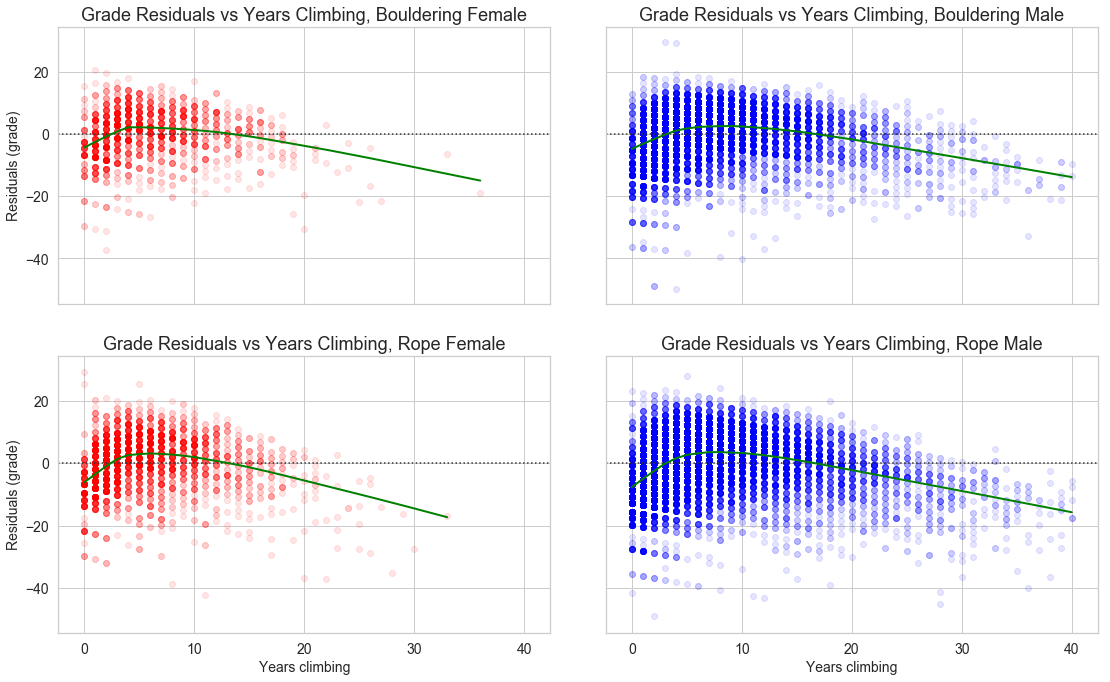

In [189]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, sharex=True, figsize=(16,10))

sns.residplot(x=df_bouldering_female[
                    (df_bouldering_female['years_climbing'] >= 0) &
                    (df_bouldering_female['years_climbing'] <= 40)]['years_climbing'],
              y=df_bouldering_female[
                    (df_bouldering_female['years_climbing'] >= 0) &
                    (df_bouldering_female['years_climbing'] <= 40)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax1, 
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_bouldering_male[
                    (df_bouldering_male['years_climbing'] >= 0) &
                    (df_bouldering_male['years_climbing'] <= 40)]['years_climbing'],
              y=df_bouldering_male[
                    (df_bouldering_male['years_climbing'] >= 0) &
                    (df_bouldering_male['years_climbing'] <= 40)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax2,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_female[
                    (df_rope_female['years_climbing'] >= 0) &
                    (df_rope_female['years_climbing'] <= 40)]['years_climbing'],
              y=df_rope_female[
                    (df_rope_female['years_climbing'] >= 0) &
                    (df_rope_female['years_climbing'] <= 40)]['index_grade'],
              lowess=True, scatter_kws={'color':'red', 'alpha': 0.1}, ax=ax3,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

sns.residplot(x=df_rope_male[
                    (df_rope_male['years_climbing'] >= 0) &
                    (df_rope_male['years_climbing'] <= 40)]['years_climbing'],
              y=df_rope_male[
                    (df_rope_male['years_climbing'] >= 0) &
                    (df_rope_male['years_climbing'] <= 40)]['index_grade'],
              lowess=True, scatter_kws={'color':'blue', 'alpha': 0.1}, ax=ax4,
              line_kws={'color':'green', 'lw': 2, 'alpha': 1})

ax1.set_title('Grade Residuals vs Years Climbing, Bouldering Female', fontsize=18)
ax2.set_title('Grade Residuals vs Years Climbing, Bouldering Male', fontsize=18)
ax3.set_title('Grade Residuals vs Years Climbing, Rope Female', fontsize=18)
ax4.set_title('Grade Residuals vs Years Climbing, Rope Male', fontsize=18)

ax3.set_xlabel('Years climbing', fontsize=14)
ax4.set_xlabel('Years climbing', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax2.set_xlabel('', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax3.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)
ax4.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

plt.tight_layout()

In [190]:
print(lm_grade_vs_years_climbing_bouldering_female.resid.mean())
print(lm_grade_vs_years_climbing_bouldering_male.resid.mean())
print(lm_grade_vs_years_climbing_rope_female.resid.mean())
print(lm_grade_vs_years_climbing_rope_male.resid.mean())

-1.2776257804634911e-14
-5.134493796011654e-14
1.054462503464293e-14
-2.036468308568725e-14


In [191]:
print(lm_grade_vs_years_climbing_bouldering_female.resid.sum())
print(lm_grade_vs_years_climbing_bouldering_male.resid.sum())
print(lm_grade_vs_years_climbing_rope_female.resid.sum())
print(lm_grade_vs_years_climbing_rope_male.resid.sum())

-2.3305801732931286e-11
-5.487663656822406e-10
3.3367086871294305e-11
-6.684786058031023e-11


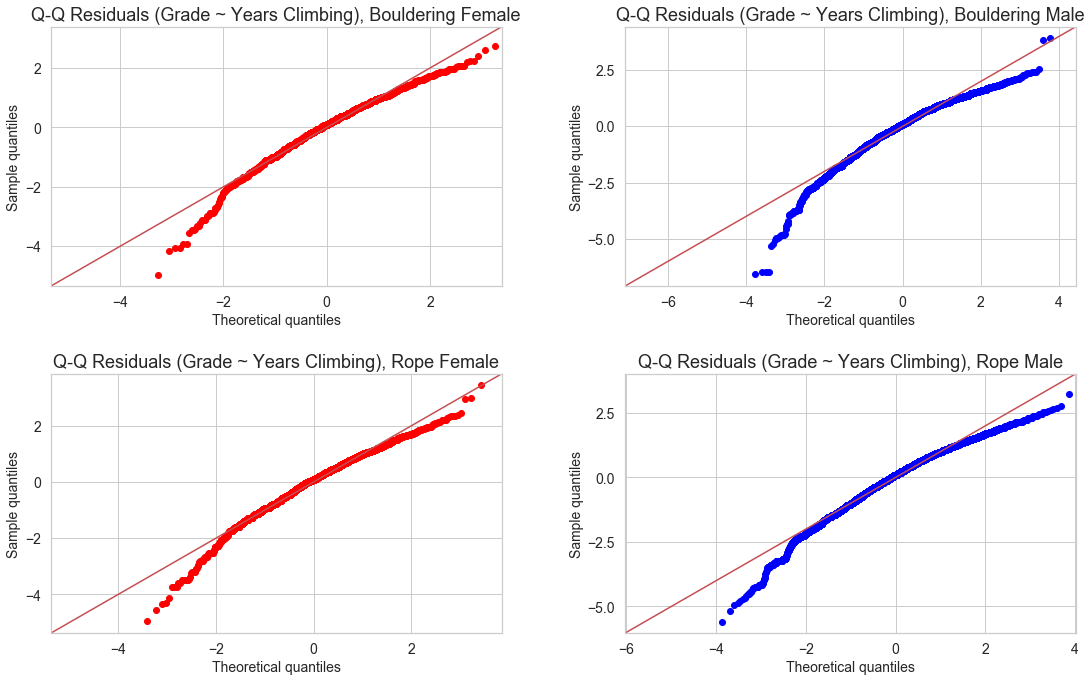

In [192]:
# QQ plots
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sm.qqplot(lm_grade_vs_years_climbing_bouldering_female.resid, line='45', fit=True, ax=ax[0,0], color='red')
sm.qqplot(lm_grade_vs_years_climbing_bouldering_male.resid, line='45', fit=True, ax=ax[0,1], color='blue')
sm.qqplot(lm_grade_vs_years_climbing_rope_female.resid, line='45', fit=True, ax=ax[1,0], color='red')
sm.qqplot(lm_grade_vs_years_climbing_rope_male.resid, line='45', fit=True, ax=ax[1,1], color='blue')

ax[0,0].set_title('Q-Q Residuals (Grade ~ Years Climbing), Bouldering Female', fontsize=18)
ax[0,1].set_title('Q-Q Residuals (Grade ~ Years Climbing), Bouldering Male', fontsize=18)
ax[1,0].set_title('Q-Q Residuals (Grade ~ Years Climbing), Rope Female', fontsize=18)
ax[1,1].set_title('Q-Q Residuals (Grade ~ Years Climbing), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[0,1].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,0].set_xlabel('Theoretical quantiles', fontsize=14)
ax[1,1].set_xlabel('Theoretical quantiles', fontsize=14)

ax[0,0].set_ylabel('Sample quantiles', fontsize=14)
ax[0,1].set_ylabel('Sample quantiles', fontsize=14)
ax[1,0].set_ylabel('Sample quantiles', fontsize=14)
ax[1,1].set_ylabel('Sample quantiles', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

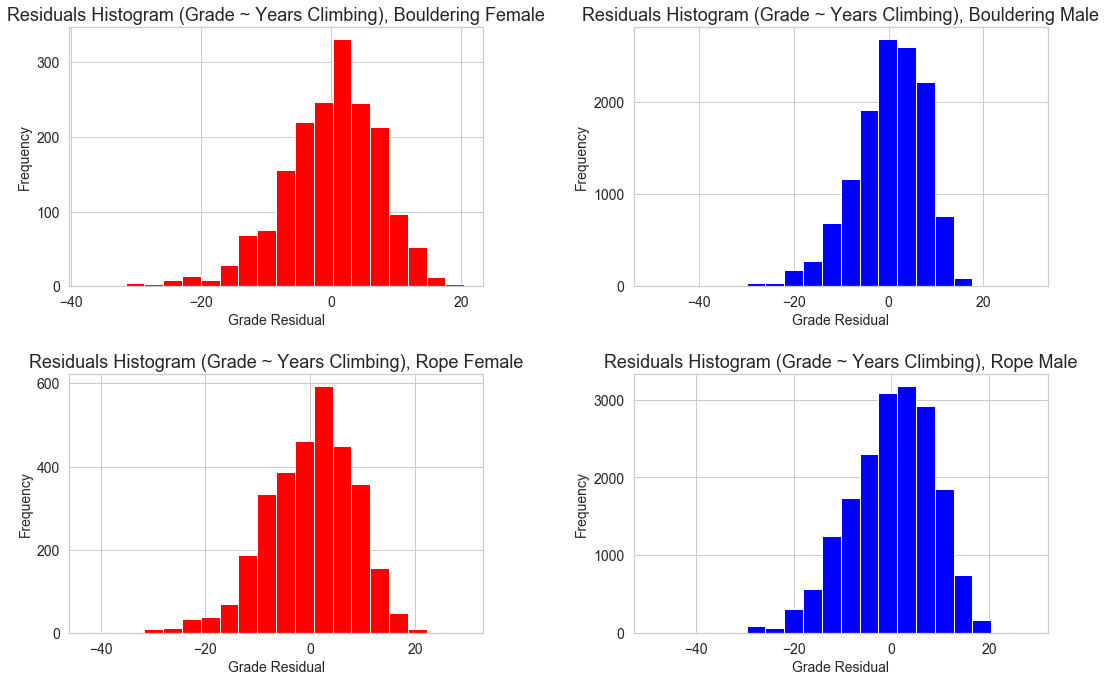

In [193]:
# Residual histograms
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].hist(lm_grade_vs_years_climbing_bouldering_female.resid, bins=20, color='red')
ax[0,1].hist(lm_grade_vs_years_climbing_bouldering_male.resid, bins=20, color='blue')
ax[1,0].hist(lm_grade_vs_years_climbing_rope_female.resid, bins=20, color='red')
ax[1,1].hist(lm_grade_vs_years_climbing_rope_male.resid, bins=20, color='blue')

ax[0,0].set_title('Residuals Histogram (Grade ~ Years Climbing), Bouldering Female', fontsize=18)
ax[0,1].set_title('Residuals Histogram (Grade ~ Years Climbing), Bouldering Male', fontsize=18)
ax[1,0].set_title('Residuals Histogram (Grade ~ Years Climbing), Rope Female', fontsize=18)
ax[1,1].set_title('Residuals Histogram (Grade ~ Years Climbing), Rope Male', fontsize=18)

ax[0,0].set_xlabel('Grade Residual', fontsize=14)
ax[0,1].set_xlabel('Grade Residual', fontsize=14)
ax[1,0].set_xlabel('Grade Residual', fontsize=14)
ax[1,1].set_xlabel('Grade Residual', fontsize=14)

ax[0,0].set_ylabel('Frequency', fontsize=14)
ax[0,1].set_ylabel('Frequency', fontsize=14)
ax[1,0].set_ylabel('Frequency', fontsize=14)
ax[1,1].set_ylabel('Frequency', fontsize=14)

plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [194]:
# ---- GRADE VS IS_FEMALE ----

In [200]:
sns.set(style='whitegrid')
g = sns.lmplot(x='is_female', y='index_grade', height=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.05', 'color':'green',
                       's':0.1*df_all.groupby(['is_female','index_grade']).count()['id_user']},
               data=df_all)
g.fig.suptitle('Grade vs Gender')
g.set(xlabel='Gender (0-male, 1-female)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [201]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='is_female', y='index_grade',
               height=10, col='is_bouldering', legend=False, fit_reg=True, sharey=True,
               scatter_kws={
                       'alpha':'0.25','color':'green',
                       's':0.2*df_all.groupby(['is_female','index_grade']).count()['id_user']},
               data=df_all)
g.fig.suptitle('Grade vs Gender')
g.set(xlabel='Gender (0=male, 1=female)', ylabel='Climbing grade', )
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

C:\Users\steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [197]:
# Linear regression fit
lm_grade_vs_gender_bouldering = \
        smf.ols('index_grade ~ is_female', 
                data=df_all[df_all['is_bouldering'] == 1]).fit()

print(lm_grade_vs_gender_bouldering.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Gender',
        'Type': 'Bouldering',
        'Gender': '-',
        'Coefficient': round(lm_grade_vs_gender_bouldering.params[1],3),
        'Std_error': round(lm_grade_vs_gender_bouldering.bse[1],3),
        'P_value': round(lm_grade_vs_gender_bouldering.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     702.0
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          5.74e-152
Time:                        16:57:05   Log-Likelihood:                -67292.
No. Observations:               19213   AIC:                         1.346e+05
Df Residuals:                   19211   BIC:                         1.346e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.7748      0.062    819.715      0.0

In [198]:
# Linear regression fit
lm_grade_vs_gender_rope = \
        smf.ols('index_grade ~ is_female', 
                data=df_all[df_all['is_bouldering'] == 0]).fit()

print(lm_grade_vs_gender_rope.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Gender',
        'Type': 'Rope',
        'Gender': '-',
        'Coefficient': round(lm_grade_vs_gender_rope.params[1],3),
        'Std_error': round(lm_grade_vs_gender_rope.bse[1],3),
        'P_value': round(lm_grade_vs_gender_rope.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     611.9
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          8.98e-134
Time:                        16:57:05   Log-Likelihood:            -1.1191e+05
No. Observations:               30385   AIC:                         2.238e+05
Df Residuals:                   30383   BIC:                         2.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4659      0.060    859.015      0.0

In [199]:
'''# Test that reducing the variable size removes the high condition number
df_test = df_rope_male.copy()
df_test['height'] = df_test['height']/100

lm_test = \
        smf.ols('id_grade ~ height', 
                data=df_test[
                    (df_test['height'] >= 1.20) & 
                    (df_test['height'] <= 2.40)]).fit()

print(lm_test.summary())'''

"# Test that reducing the variable size removes the high condition number\ndf_test = df_rope_male.copy()\ndf_test['height'] = df_test['height']/100\n\nlm_test =         smf.ols('id_grade ~ height', \n                data=df_test[\n                    (df_test['height'] >= 1.20) & \n                    (df_test['height'] <= 2.40)]).fit()\n\nprint(lm_test.summary())"

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\steve\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


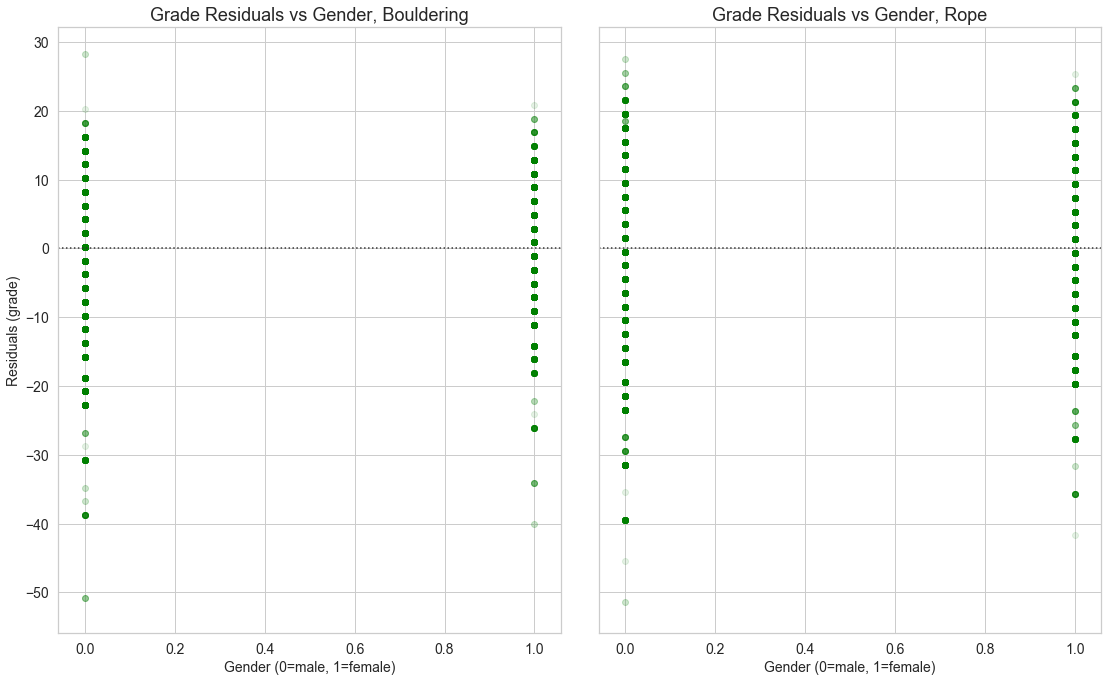

In [202]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(16,10))

sns.residplot(x=df_all[df_all['is_bouldering'] == 1]['is_female'],
              y=df_all[df_all['is_bouldering'] == 1]['index_grade'],
              lowess=True, scatter_kws={'color':'green', 'alpha': 0.1}, ax=ax1, 
              line_kws={'color':'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_all[df_all['is_bouldering'] == 0]['is_female'],
              y=df_all[df_all['is_bouldering'] == 0]['index_grade'],
              lowess=True, scatter_kws={'color':'green', 'alpha': 0.1}, ax=ax2,
              line_kws={'color':'red', 'lw': 1, 'alpha': 0.8})

ax1.set_title('Grade Residuals vs Gender, Bouldering', fontsize=18)
ax2.set_title('Grade Residuals vs Gender, Rope', fontsize=18)

ax1.set_xlabel('Gender (0=male, 1=female)', fontsize=14)
ax2.set_xlabel('Gender (0=male, 1=female)', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

plt.tight_layout()

In [203]:
print(lm_grade_vs_gender_bouldering.resid.mean())
print(lm_grade_vs_gender_rope.resid.mean())

7.583350835154105e-14
-4.871458547102649e-13


In [204]:
print(lm_grade_vs_gender_bouldering.resid.sum())
print(lm_grade_vs_gender_rope.resid.sum())

2.76190803560894e-09
-4.207322490401566e-09


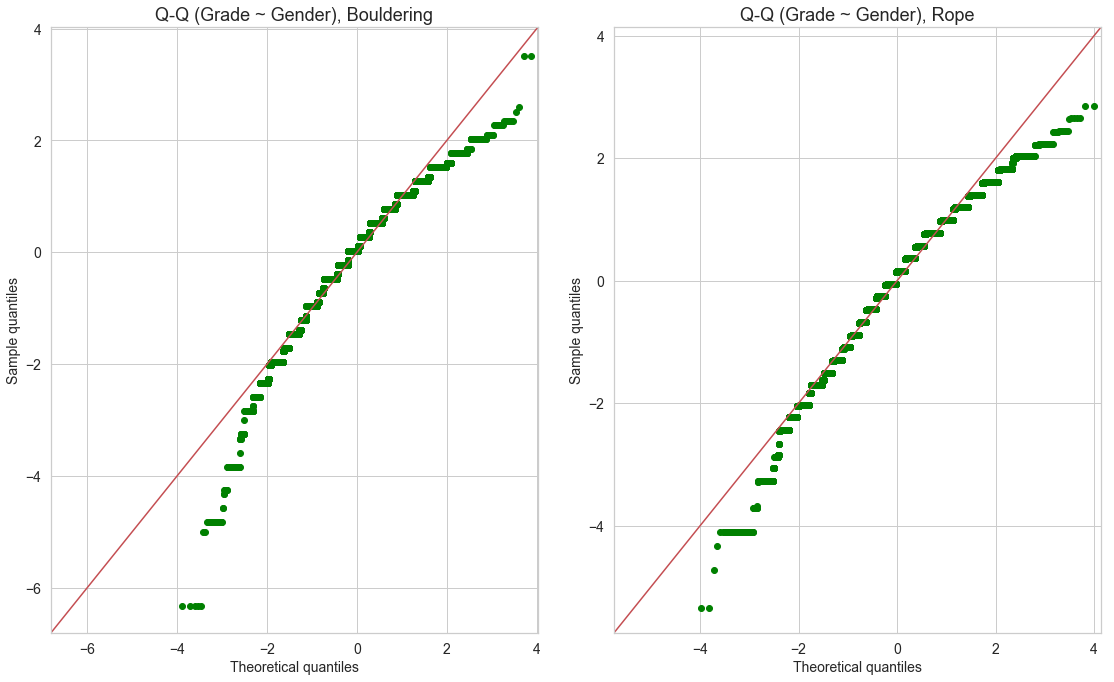

In [205]:
# QQ plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

sm.qqplot(lm_grade_vs_gender_bouldering.resid, line='45', fit=True, ax=ax1, color='green')
sm.qqplot(lm_grade_vs_gender_rope.resid, line='45', fit=True, ax=ax2, color='green')

ax1.set_title('Q-Q (Grade ~ Gender), Bouldering', fontsize=18)
ax2.set_title('Q-Q (Grade ~ Gender), Rope', fontsize=18)

ax1.set_xlabel('Theoretical quantiles', fontsize=14)
ax2.set_xlabel('Theoretical quantiles', fontsize=14)

ax1.set_ylabel('Sample quantiles', fontsize=14)
ax2.set_ylabel('Sample quantiles', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

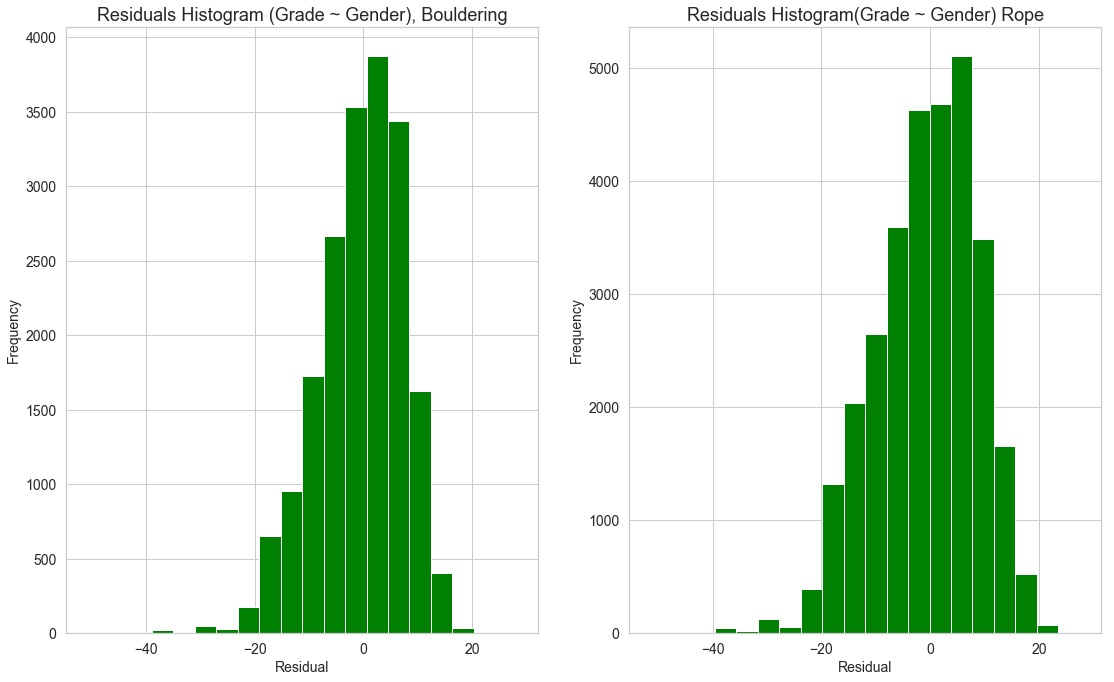

In [206]:
# Residual histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))

ax1.hist(lm_grade_vs_gender_bouldering.resid, bins=20, color='green')
ax2.hist(lm_grade_vs_gender_rope.resid, bins=20, color='green')

ax1.set_title('Residuals Histogram (Grade ~ Gender), Bouldering', fontsize=18)
ax2.set_title('Residuals Histogram(Grade ~ Gender) Rope', fontsize=18)

ax1.set_xlabel('Residual', fontsize=14)
ax2.set_xlabel('Residual', fontsize=14)

ax1.set_ylabel('Frequency', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

In [207]:
# =====================================
# Clean up results dataframe
checkpoint_df_results_univariate_1 = df_results_univariate.copy()

In [208]:
df_results_univariate['Statistically_significant'] = None

In [209]:
for i in range(0,len(df_results_univariate)):
    if (df_results_univariate['P_value'][i] <= 0.05):
        df_results_univariate['Statistically_significant'][i] = 'Yes'
    else:
        df_results_univariate['Statistically_significant'][i] = 'No'

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
df_results_univariate

Variable        Type Gender  Coefficient  Std_error  P_value  \
0      Height (cm)  Bouldering      F       -0.053      0.028    0.063   
1      Height (cm)  Bouldering      M       -0.074      0.010    0.000   
2      Height (cm)        Rope      F       -0.044      0.024    0.072   
3      Height (cm)        Rope      M       -0.098      0.009    0.000   
4      Weight (kg)  Bouldering      F       -0.062      0.028    0.028   
5      Weight (kg)  Bouldering      M       -0.129      0.008    0.000   
6      Weight (kg)        Rope      F       -0.103      0.025    0.000   
7      Weight (kg)        Rope      M       -0.188      0.008    0.000   
8              Age  Bouldering      F       -0.022      0.031    0.478   
9              Age  Bouldering      M       -0.068      0.011    0.000   
10             Age        Rope      F        0.037      0.027    0.168   
11             Age        Rope      M        0.002      0.010    0.814   
12  Years climbing  Bouldering      F        0.846      0.039    0.000   
13  Years climbing  Bouldering      M        0.410      0.012    0.000   
14  Years climbing        Rope      F        1.160      0.033    0.000   
15  Years climbing        Rope      M        0.625      0.011    0.000   
16          Gender  Bouldering      -       -4.648      0.175    0.000   
17          Gender        Rope      -       -3.812      0.154    0.000   

   Statistically_significant  
0                         No  
1                        Yes  
2                         No  
3                        Yes  
4                        Yes  
5                        Yes  
6                        Yes  
7                        Yes  
8                         No  
9                        Yes  
10                        No  
11                        No  
12                       Yes  
13                       Yes  
14                       Yes  
15                       Yes  
16                       Yes  
17                       Yes

In [214]:
dill.dump(df_results_univariate, open("df_results_univariate.pkl", "wb"))

In [215]:
# ==========================================
# MULTIVARIATE ANALYSES

In [211]:
# ---- FILTER DATA ----
df_all_filtered = df_all[(df_all['height'] >= 120) &
      (df_all['height'] <= 240) &
      (df_all['weight'] != 0) &
      (df_all['age'] >= 10) &
      (df_all['age'] <= 50) &
      (df_all['years_climbing'] >= 0) &
      (df_all['years_climbing'] <= 40)].drop(columns='id_user')\
[['index_grade','height','weight','age','years_climbing','is_female','is_bouldering']]

In [212]:
# ---- CORRELATIONS ----
corr_df_all_filtered = round(df_all_filtered.corr(), 2)
corr_df_all_filtered

index_grade  height  weight   age  years_climbing  is_female  \
index_grade            1.00   -0.01   -0.10 -0.01            0.40      -0.12   
height                -0.01    1.00    0.70  0.10            0.02      -0.49   
weight                -0.10    0.70    1.00  0.22            0.05      -0.49   
age                   -0.01    0.10    0.22  1.00            0.49      -0.03   
years_climbing         0.40    0.02    0.05  0.49            1.00      -0.06   
is_female             -0.12   -0.49   -0.49 -0.03           -0.06       1.00   
is_bouldering         -0.07    0.01    0.00 -0.05            0.02      -0.03   

                is_bouldering  
index_grade             -0.07  
height                   0.01  
weight                   0.00  
age                     -0.05  
years_climbing           0.02  
is_female               -0.03  
is_bouldering            1.00

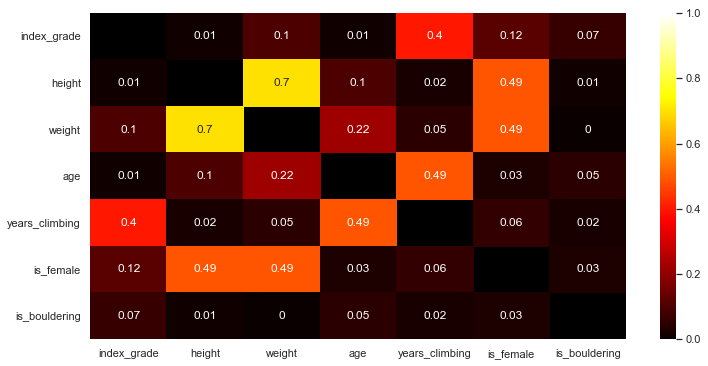

In [213]:
plt.figure(figsize = (12,6))
sns.set(font_scale=1)
g = sns.heatmap(abs(corr_df_all_filtered), annot=True, cmap='hot', mask=np.eye(len(corr_df_all_filtered)))
g.set_facecolor('black')

From the correlation matrix above we see that height and weight are highly correlated as well as age and years_climbing. is_female is also somewhat correlated with weight and height although just below the threshold we will use of 0.5. 

**Consider height (but not weight) and years_climbing (but not age) when completing a multivariate analysis**

In [214]:
# ---- VIF ----
lm_all_filtered = smf.ols(
    'index_grade ~ height + weight + age + years_climbing + is_female + is_bouldering',
    data = df_all_filtered).fit()

In [215]:
vif = pd.DataFrame()
variables = lm_all_filtered.model.exog
vif["VIF Factor"] = [vif_(variables, i) for i in range(variables.shape[1])]
vif["features"] = lm_all_filtered.model.exog_names
vif

VIF Factor        features
0  619.927690       Intercept
1    2.090677          height
2    2.208518          weight
3    1.413647             age
4    1.336331  years_climbing
5    1.425297       is_female
6    1.006420   is_bouldering

In [216]:
# ---- MODEL ----
# Filter data
df_final = df_all[(df_all['height'] >= 120) &
      (df_all['height'] <= 240) &
      (df_all['age'] >= 10) &
      (df_all['age'] <= 50) &
      (df_all['years_climbing'] >= 0) &
      (df_all['years_climbing'] <= 40)].drop(columns='id_user')\
[['index_grade','height','age','years_climbing','is_female','is_bouldering']]

In [217]:
# ---- MODEL ----
lm_final_bouldering_female = \
        smf.ols('index_grade ~ height + age + years_climbing', 
                data=df_final[
                    (df_final['is_bouldering'] == 1) & 
                    (df_final['is_female'] == 1)]).fit()

print(lm_final_bouldering_female.summary())

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           9.43e-76
Time:                        16:59:41   Log-Likelihood:                -3655.7
No. Observations:                1081   AIC:                             7319.
Df Residuals:                    1077   BIC:                             7339.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.0555      4.654     12.

In [218]:
df_results = pd.DataFrame(columns=['Type','Gender','Coefficient','Value','Std_error','P_value'])

In [219]:
for i in range(0,4):
    df_results_temp = pd.DataFrame([{
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': lm_final_bouldering_female.params.index[i],
        'Value': round(lm_final_bouldering_female.params.values[i],2),
        'Std_error': round(lm_final_bouldering_female.bse.values[i],2),
        'P_value': round(lm_final_bouldering_female.pvalues.values[i],3)}])
    
    df_results_temp = df_results_temp[['Type','Gender','Coefficient','Value','Std_error','P_value']]

    df_results = pd.DataFrame.append(df_results, df_results_temp).reset_index(drop=True)
    
df_results

Type Gender     Coefficient  Value  Std_error  P_value
0  Bouldering      F       Intercept  57.06       4.65    0.000
1  Bouldering      F          height  -0.05       0.03    0.059
2  Bouldering      F             age  -0.27       0.03    0.000
3  Bouldering      F  years_climbing   0.98       0.05    0.000

In [220]:
lm_final_bouldering_male = \
        smf.ols('index_grade ~ height + age + years_climbing', 
                data=df_final[
                    (df_final['is_bouldering'] == 1) & 
                    (df_final['is_female'] == 0)]).fit()

print(lm_final_bouldering_male.summary())

for i in range(0,4):
    df_results_temp = pd.DataFrame([{
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': lm_final_bouldering_male.params.index[i],
        'Value': round(lm_final_bouldering_male.params.values[i],2),
        'Std_error': round(lm_final_bouldering_male.bse.values[i],2),
        'P_value': round(lm_final_bouldering_male.pvalues.values[i],3)}])
    
    df_results_temp = df_results_temp[['Type','Gender','Coefficient','Value','Std_error','P_value']]

    df_results = pd.DataFrame.append(df_results, df_results_temp).reset_index(drop=True)
    
df_results

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     567.7
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:59:47   Log-Likelihood:                -27661.
No. Observations:                8179   AIC:                         5.533e+04
Df Residuals:                    8175   BIC:                         5.536e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.0235      1.838     34.

Type Gender     Coefficient  Value  Std_error  P_value
0  Bouldering      F       Intercept  57.06       4.65    0.000
1  Bouldering      F          height  -0.05       0.03    0.059
2  Bouldering      F             age  -0.27       0.03    0.000
3  Bouldering      F  years_climbing   0.98       0.05    0.000
4  Bouldering      M       Intercept  63.02       1.84    0.000
5  Bouldering      M          height  -0.04       0.01    0.000
6  Bouldering      M             age  -0.35       0.01    0.000
7  Bouldering      M  years_climbing   0.66       0.02    0.000

In [221]:
lm_final_rope_female = \
        smf.ols('index_grade ~ height + age + years_climbing', 
                data=df_final[
                    (df_final['is_bouldering'] == 0) & 
                    (df_final['is_female'] == 1)]).fit()

print(lm_final_rope_female.summary())

for i in range(0,4):
    df_results_temp = pd.DataFrame([{
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': lm_final_rope_female.params.index[i],
        'Value': round(lm_final_rope_female.params.values[i],2),
        'Std_error': round(lm_final_rope_female.bse.values[i],2),
        'P_value': round(lm_final_rope_female.pvalues.values[i],3)}])
    
    df_results_temp = df_results_temp[['Type','Gender','Coefficient','Value','Std_error','P_value']]

    df_results = pd.DataFrame.append(df_results, df_results_temp).reset_index(drop=True)
    
df_results

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     320.0
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          6.33e-168
Time:                        16:59:49   Log-Likelihood:                -6656.2
No. Observations:                1889   AIC:                         1.332e+04
Df Residuals:                    1885   BIC:                         1.334e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         50.6486      4.109     12.

Type Gender     Coefficient  Value  Std_error  P_value
0   Bouldering      F       Intercept  57.06       4.65    0.000
1   Bouldering      F          height  -0.05       0.03    0.059
2   Bouldering      F             age  -0.27       0.03    0.000
3   Bouldering      F  years_climbing   0.98       0.05    0.000
4   Bouldering      M       Intercept  63.02       1.84    0.000
5   Bouldering      M          height  -0.04       0.01    0.000
6   Bouldering      M             age  -0.35       0.01    0.000
7   Bouldering      M  years_climbing   0.66       0.02    0.000
8         Rope      F       Intercept  50.65       4.11    0.000
9         Rope      F          height  -0.02       0.03    0.445
10        Rope      F             age  -0.23       0.03    0.000
11        Rope      F  years_climbing   1.30       0.04    0.000

In [222]:
lm_final_rope_male = \
        smf.ols('index_grade ~ height + age + years_climbing', 
                data=df_final[
                    (df_final['is_bouldering'] == 0) & 
                    (df_final['is_female'] == 0)]).fit()

print(lm_final_rope_male.summary())

for i in range(0,4):
    df_results_temp = pd.DataFrame([{
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': lm_final_rope_male.params.index[i],
        'Value': round(lm_final_rope_male.params.values[i],2),
        'Std_error': round(lm_final_rope_male.bse.values[i],2),
        'P_value': round(lm_final_rope_male.pvalues.values[i],3)}])
    
    df_results_temp = df_results_temp[['Type','Gender','Coefficient','Value','Std_error','P_value']]

    df_results = pd.DataFrame.append(df_results, df_results_temp).reset_index(drop=True)
    
df_results

                            OLS Regression Results                            
Dep. Variable:            index_grade   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1297.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:59:50   Log-Likelihood:                -42113.
No. Observations:               11934   AIC:                         8.423e+04
Df Residuals:                   11930   BIC:                         8.426e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         68.4326      1.749     39.

Type Gender     Coefficient  Value  Std_error  P_value
0   Bouldering      F       Intercept  57.06       4.65    0.000
1   Bouldering      F          height  -0.05       0.03    0.059
2   Bouldering      F             age  -0.27       0.03    0.000
3   Bouldering      F  years_climbing   0.98       0.05    0.000
4   Bouldering      M       Intercept  63.02       1.84    0.000
5   Bouldering      M          height  -0.04       0.01    0.000
6   Bouldering      M             age  -0.35       0.01    0.000
7   Bouldering      M  years_climbing   0.66       0.02    0.000
8         Rope      F       Intercept  50.65       4.11    0.000
9         Rope      F          height  -0.02       0.03    0.445
10        Rope      F             age  -0.23       0.03    0.000
11        Rope      F  years_climbing   1.30       0.04    0.000
12        Rope      M       Intercept  68.43       1.75    0.000
13        Rope      M          height  -0.07       0.01    0.000
14        Rope      M             age  -0.37       0.01    0.000
15        Rope      M  years_climbing   0.91       0.01    0.000

In [223]:
df_results['Statistically_significant'] = None

In [224]:
for i in range(0,len(df_results)):
    if (df_results['P_value'][i] <= 0.05):
        df_results['Statistically_significant'][i] = 'Yes'
    else:
        df_results['Statistically_significant'][i] = 'No'

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [230]:
dill.dump(df_results, open("df_results.pkl", "wb"))

In [232]:
# ---- RESIDUALS VS FITTED_VALUES ----
sns.set(style='whitegrid')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(16,10))

sns.regplot(x=lm_final_bouldering_female.fittedvalues,
           y=lm_final_bouldering_female.resid, ax=ax1,
            fit_reg=True, lowess=True, 
            scatter_kws={'color':'red', 'alpha':'0.1'}, 
            line_kws={'color':'green','lw':'2'})

sns.regplot(x=lm_final_bouldering_male.fittedvalues,
           y=lm_final_bouldering_male.resid, ax=ax2,
            fit_reg=True, lowess=True, 
            scatter_kws={'color':'blue', 'alpha':'0.03'}, 
            line_kws={'color':'green','lw':'2'})

sns.regplot(x=lm_final_rope_female.fittedvalues,
           y=lm_final_rope_female.resid, ax=ax3,
            fit_reg=True, lowess=True, 
            scatter_kws={'color':'red', 'alpha':'0.1'}, 
            line_kws={'color':'green','lw':'2'})

sns.regplot(x=lm_final_rope_male.fittedvalues,
           y=lm_final_rope_male.resid, ax=ax4,
            fit_reg=True, lowess=True, 
            scatter_kws={'color':'blue', 'alpha':'0.03'}, 
            line_kws={'color':'green','lw':'2'})

ax1.set_title('Grade Residuals vs Fitted Values, Bouldering Female', fontsize=18)
ax2.set_title('Grade Residuals vs Fitted Values, Bouldering Male', fontsize=18)
ax3.set_title('Grade Residuals vs Fitted Values, Rope Female', fontsize=18)
ax4.set_title('Grade Residuals vs Fitted Values, Rope Male', fontsize=18)

ax3.set_xlabel('Fitted Values', fontsize=14)
ax4.set_xlabel('Fitted Values', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax2.set_xlabel('', fontsize=14)

ax1.set_ylabel('Residuals (grade)', fontsize=14)
ax3.set_ylabel('Residuals (grade)', fontsize=14)
ax2.set_ylabel('', fontsize=14)
ax4.set_ylabel('', fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

plt.tight_layout()